# **Marketing Campaign Analysis**

## **Problem Definition**
Customer segmentation is the process of dividing a dataset of customers into groups of similar
customers based on certain common characteristics, usually for the purpose of understanding the
population dataset in a better fashion. Understanding customer behavior and characteristics is
usually a critical part of the marketing operations of any business or organization, with direct
consequences on sales & marketing strategy. Customer segmentation is often viewed as a means to
achieve a better return on investment from marketing efforts, and make organizations more efficient
in terms of utilizing their money, time, and other critical resources in custom marketing strategies for
different groups of customers based on their unique needs and motivations.

For example, it has been understood from various research that customer segmentation often has a
huge impact on people’s email engagement. Segmented campaigns often see over 100% more
clicks than non-segmented campaigns, and email marketers who have segmented their audience
before campaigning have reported a 6-7 times growth in their overall revenue. It has also been
observed in various contexts that in today’s world, individual customers prefer personalized
communications and offerings that cater to their particular interests.

In the context of marketing analytics then, customer segmentation has a vital role to play in
optimizing ROI. It typically involves analyzing metrics around customer engagement with various
marketing activities including but not limited to, ATL (above the line) marketing activities, BTL (below
the line) campaigns, and targeting personalized offers. Typically, the variables of interest are
customer profiles, campaign conversion rates, and information associated with various marketing
channels. Based on these feature categories, the target is to create the best possible customer
segments from the given data.
### **The Context:**

 Using Unsupervised Learning ideas such as Dimensionality Reduction and Clustering, the objective
is to come up with the best possible customer segments using the given customer dataset.


------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques.

### **Loading Libraries**

In [ ]:
# Libraries to help with reading and manipulating data
!pip install scikit-learn-extra
!pip install autoviz
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
# To compute distances
from scipy.spatial.distance import cdist
# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer
# Importing PCA
from sklearn.decomposition import PCA
# To encode the variable
from sklearn.preprocessing import LabelEncoder
# Importing TSNE
from sklearn.manifold import TSNE
# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
# To compute distances
from scipy.spatial.distance import pdist
# To import K-Medoids
from sklearn_extra.cluster import KMedoids
# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture
# To supress warnings
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


### **Let us load the data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Capstone/marketing_campaign.csv")

### **Check the shape of the data**

In [ ]:
# Print the shape of the data
data.shape

(2240, 27)

#### **Observations and Insights: _____**

There are 2240 rows and 27 columns

### **Understand the data by observing a few rows**

In [ ]:
# View first 5 rows
data.head()

ID   Year_Birth  Education  Marital_Status  Income   Kidhome  Teenhome  \
0  5524     1957     Graduation      Single     58138.0     0         0      
1  2174     1954     Graduation      Single     46344.0     1         1      
2  4141     1965     Graduation    Together     71613.0     0         0      
3  6182     1984     Graduation    Together     26646.0     1         0      
4  5324     1981            PhD     Married     58293.0     1         0      

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012    58        635       88            546              172         
1  08-03-2014    38         11        1              6                2         
2  21-08-2013    26        426       49            127              111         
3  10-02-2014    26         11        4             20               10         
4  19-01-2014    94        173       43            118               46         

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0         88              88               3                 8          
1          1               6               2                 1          
2         21              42               1                 8          
3          3               5               2                 2          
4         27              15               5                 5          

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0          10                   4                  7                0        
1           1                   2                  5                0        
2           2                  10                  4                0        
3           0                   4                  6                0        
4           3                   6                  5                0        

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0        0             0             0             0           0         1     
1        0             0             0             0           0         0     
2        0             0             0             0           0         0     
3        0             0             0             0           0         0     
4        0             0             0             0           0         0

#### **Observations and Insights: _____**

This dataset consists of 2240 rows and 27 attributes. In can be categorized in following four subsets:
- Customer
- Product
- Promotion
- Place


## **Exploratory Data Analysis**

1. Is there missig Values?
2. Explore Summary stat?
3. Any extreme value?
4. Is ther skewed dist in dataset?
5. Why should we drop ID column or any?

In [ ]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Statistical sumamry sets
data.describe()

ID       Year_Birth      Income        Kidhome     Teenhome    \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

         Recency     MntWines     MntFruits   MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000    2240.000000     
mean     49.109375   303.935714    26.302232     166.950000     
std      28.962453   336.597393    39.773434     225.715373     
min       0.000000     0.000000     0.000000       0.000000     
25%      24.000000    23.750000     1.000000      16.000000     
50%      49.000000   173.500000     8.000000      67.000000     
75%      74.000000   504.250000    33.000000     232.000000     
max      99.000000  1493.000000   199.000000    1725.000000     

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count    2240.000000       2240.000000     2240.000000     2240.000000      
mean       37.525446         27.062946       44.021875        2.325000      
std        54.628979         41.280498       52.167439        1.932238      
min         0.000000          0.000000        0.000000        0.000000      
25%         3.000000          1.000000        9.000000        1.000000      
50%        12.000000          8.000000       24.000000        2.000000      
75%        50.000000         33.000000       56.000000        3.000000      
max       259.000000        263.000000      362.000000       15.000000      

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count    2240.000000        2240.000000         2240.000000      
mean        4.084821           2.662054            5.790179      
std         2.778714           2.923101            3.250958      
min         0.000000           0.000000            0.000000      
25%         2.000000           0.000000            3.000000      
50%         4.000000           2.000000            5.000000      
75%         6.000000           4.000000            8.000000      
max        27.000000          28.000000           13.000000      

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count     2240.000000      2240.000000   2240.000000   2240.000000   
mean         5.316518         0.072768      0.074554      0.072768   
std          2.426645         0.259813      0.262728      0.259813   
min          0.000000         0.000000      0.000000      0.000000   
25%          3.000000         0.000000      0.000000      0.000000   
50%          6.000000         0.000000      0.000000      0.000000   
75%          7.000000         0.000000      0.000000      0.000000   
max         20.000000         1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2   Complain     Response    
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.012946     0.009375     0.149107  
std        0.245316      0.113069     0.096391     0.356274  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000

#### **Observations and Insights: _____**

- We can observe that `ID` is an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.
- There are missing values
- Dt_Customer that indicates the date a customer joined is not date type data
- There are cetgorcal feature in data type "object" that need to converted into numeric.
- We need to drop the rows that have missing income values.

### **Data Cleaning and Pre-processing**

**Dropping the ID column**

In [ ]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


- Dropped null value data.


In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y') # Specify the correct format for day first dates
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [ ]:
# Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

# Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())


Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In the next bit, I will be performing the following steps to engineer some new features:

- Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
- Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
- Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
- Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
To get further clarity of household, Creating feature indicating "Family_Size"
- Create a feature "Is_Parent" to indicate parenthood status
- Lastly, I will create three categories in the "Education" by simplifying its value counts.
- Dropping some of the redundant features

In [ ]:
#Feature Engineering
#Age of customer today
data["Age"] = 2024-data["Year_Birth"]




In [ ]:
#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]


In [ ]:
#Deriving living situation by marital status"Alone"
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [ ]:
#Feature indicating total children living in the household
data["Children"] = data["Kidhome"]+ data["Teenhome"]


In [ ]:
#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone":1, "Partner":2})+ data["Children"]




In [ ]:
#Segmenting education levels in three groups (UnderGrad, Gad, PostGrad)
data["Education"]=data["Education"].replace({"Basic":"1","2n Cycle":"1", "Graduation":"2", "Master":"3", "PhD":"4"})
data["Education"] = pd.to_numeric(data["Education"], errors="coerce")


In [ ]:
#For shortening the names
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [ ]:
#Dropping some of the redundant features
to_drop = [ "ID", "Year_Birth", "Marital_Status", "Kidhome", "Teenhome", "Dt_Customer", "Recency", "NumWebVisitsMonth", "Living_With", "Children" ]
data = data.drop(to_drop, axis=1)
data.info()
data.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Wines                2216 non-null   int64  
 3   Fruits               2216 non-null   int64  
 4   Meat                 2216 non-null   int64  
 5   Fish                 2216 non-null   int64  
 6   Sweets               2216 non-null   int64  
 7   Gold                 2216 non-null   int64  
 8   NumDealsPurchases    2216 non-null   int64  
 9   NumWebPurchases      2216 non-null   int64  
 10  NumCatalogPurchases  2216 non-null   int64  
 11  NumStorePurchases    2216 non-null   int64  
 12  AcceptedCmp3         2216 non-null   int64  
 13  AcceptedCmp4         2216 non-null   int64  
 14  AcceptedCmp5         2216 non-null   int64  
 15  AcceptedCmp1         2216 non-null   int64 

Education  Income   Wines  Fruits  Meat  Fish  Sweets  Gold  \
0      2      58138.0   635     88     546   172    88     88    
1      2      46344.0    11      1       6     2     1      6    
2      2      71613.0   426     49     127   111    21     42    
3      2      26646.0    11      4      20    10     3      5    
4      4      58293.0   173     43     118    46    27     15    
5      3      62513.0   520     42      98     0    42     14    
6      2      55635.0   235     65     164    50    49     27    
7      4      33454.0    76     10      56     3     1     23    
8      4      30351.0    14      0      24     3     3      2    
9      4       5648.0    28      0       6     1     1     13    

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0          3                 8                 10                   4           
1          2                 1                  1                   2           
2          1                 8                  2                  10           
3          2                 2                  0                   4           
4          5                 5                  3                   6           
5          2                 6                  4                  10           
6          4                 7                  3                   7           
7          2                 4                  0                   4           
8          1                 3                  0                   2           
9          1                 1                  0                   0           

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0        0             0             0             0             0        
1        0             0             0             0             0        
2        0             0             0             0             0        
3        0             0             0             0             0        
4        0             0             0             0             0        
5        0             0             0             0             0        
6        0             0             0             0             0        
7        0             0             0             0             0        
8        0             0             0             0             0        
9        1             0             0             0             0        

   Complain  Response    Customer_For     Age  Spent  Family_Size  
0      0         1     57283200000000000  67   1617        1       
1      0         0      9763200000000000  70     27        3       
2      0         0     26956800000000000  59    776        2       
3      0         0     12009600000000000  40     53        3       
4      0         0     13910400000000000  43    422        3       
5      0         0     25315200000000000  57    716        3       
6      0         0     51235200000000000  53    590        2       
7      0         0     36028800000000000  39    169        3       
8      0         1     33523200000000000  50     46        3       
9      0         0      9331200000000000  74     49        4

- The above stats show some discrepancies in mean Income and Age and max Income and age.
- Do note that max-age is 131 years, As I calculated the age that would be today (i.e. 2024) and the data is old.
- I must take a look at the broader view of the data. I will plot some of the selected features.

In [ ]:
!pip install xlrd
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
df_av = data.copy()

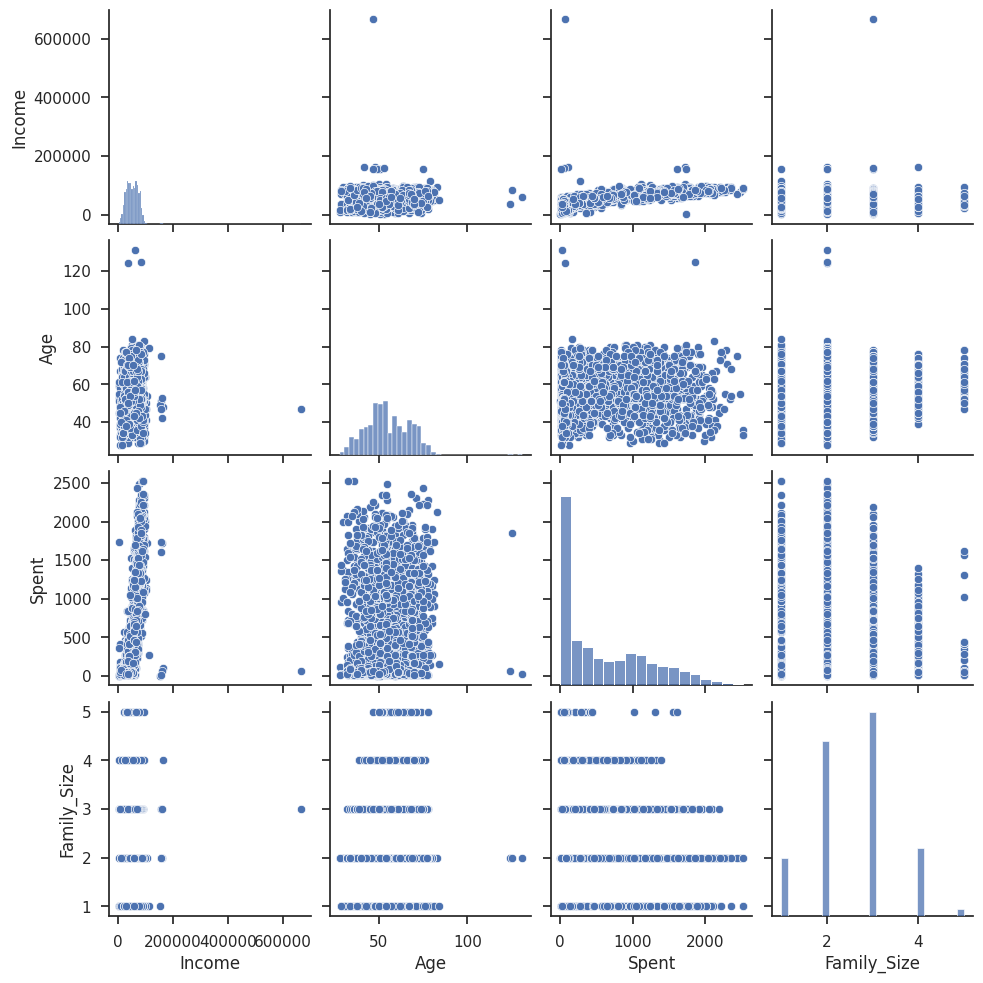

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data[['Income','Age','Spent','Family_Size']])
plt.show()

- There are a few outliers in the Income and Age features.
- I will be deleting the outliers in the data.

In [ ]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


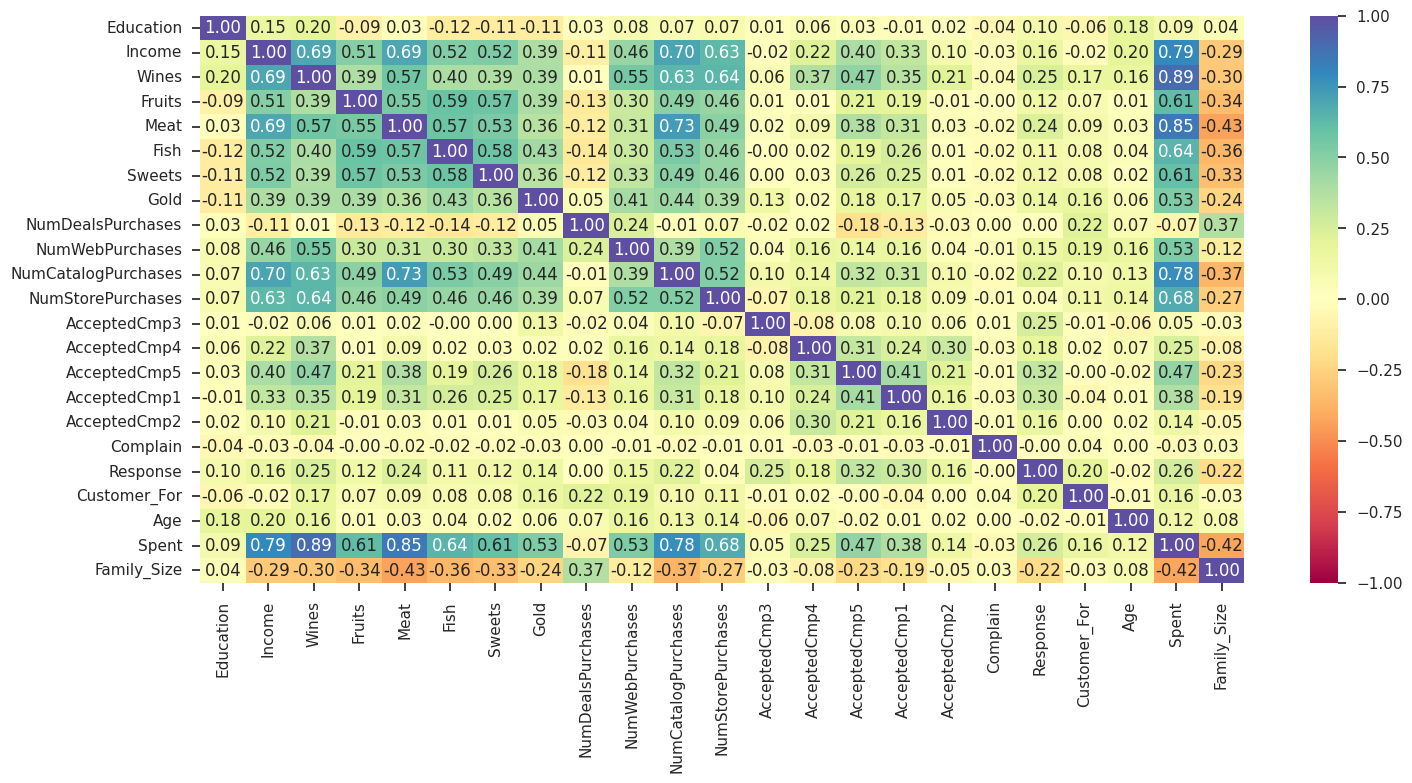

In [ ]:
numerical_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(15, 7))
sns.heatmap(numerical_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#correlation matrix
#corrmat= data.corr()
#corrmat= data.select_dtypes(include=['number']).corr() # Select only numerical columns
#plt.figure(figsize=(20,20))
#sns.heatmap(corrmat,annot=True, cmap='coolwarm', center=0)

The following steps are applied to preprocess the data:
- Label encoding the categorical features
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction

Data looks very clean and ready for next steps of preocessing.

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [ ]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

Education      Income         Wines       Fruits        Meat      \
count  2212.000000    2212.000000  2212.000000  2212.000000  2212.000000   
mean      2.485081   51958.810579   305.287523    26.329566   167.029837   
std       0.955005   21527.278844   337.322940    39.744052   224.254493   
min       1.000000    1730.000000     0.000000     0.000000     0.000000   
25%       2.000000   35233.500000    24.000000     2.000000    16.000000   
50%       2.000000   51371.000000   175.500000     8.000000    68.000000   
75%       3.000000   68487.000000   505.000000    33.000000   232.250000   
max       4.000000  162397.000000  1493.000000   199.000000  1725.000000   

          Fish        Sweets        Gold      NumDealsPurchases  \
count  2212.000000  2212.000000  2212.000000     2212.000000      
mean     37.648734    27.046564    43.925859        2.324593      
std      54.772033    41.090991    51.706981        1.924507      
min       0.000000     0.000000     0.000000        0.000000      
25%       3.000000     1.000000     9.000000        1.000000      
50%      12.000000     8.000000    24.500000        2.000000      
75%      50.000000    33.000000    56.000000        3.000000      
max     259.000000   262.000000   321.000000       15.000000      

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  AcceptedCmp3  \
count    2212.000000        2212.000000         2212.000000      2212.000000   
mean        4.088156           2.672242            5.806510         0.073689   
std         2.742187           2.927542            3.250939         0.261323   
min         0.000000           0.000000            0.000000         0.000000   
25%         2.000000           0.000000            3.000000         0.000000   
50%         4.000000           2.000000            5.000000         0.000000   
75%         6.000000           4.000000            8.000000         0.000000   
max        27.000000          28.000000           13.000000         1.000000   

       AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   Complain    \
count   2212.000000   2212.000000   2212.000000   2212.000000  2212.000000   
mean       0.074141      0.072785      0.064195      0.013110     0.009042   
std        0.262060      0.259842      0.245156      0.113773     0.094678   
min        0.000000      0.000000      0.000000      0.000000     0.000000   
25%        0.000000      0.000000      0.000000      0.000000     0.000000   
50%        0.000000      0.000000      0.000000      0.000000     0.000000   
75%        0.000000      0.000000      0.000000      0.000000     0.000000   
max        1.000000      1.000000      1.000000      1.000000     1.000000   

        Response    Customer_For      Age         Spent     Family_Size  
count  2212.000000  2.212000e+03  2212.000000  2212.000000  2212.000000  
mean      0.150542  3.056091e+16    55.086347   607.268083     2.593128  
std       0.357683  1.749556e+16    11.701599   602.513364     0.906236  
min       0.000000  0.000000e+00    28.000000     5.000000     1.000000  
25%       0.000000  1.555200e+16    47.000000    69.000000     2.000000  
50%       0.000000  3.075840e+16    54.000000   397.000000     3.000000  
75%       0.000000  4.570560e+16    65.000000  1048.000000     3.000000  
max       1.000000  6.039360e+16    84.000000  2525.000000     5.000000

Education
Skew : 0.4


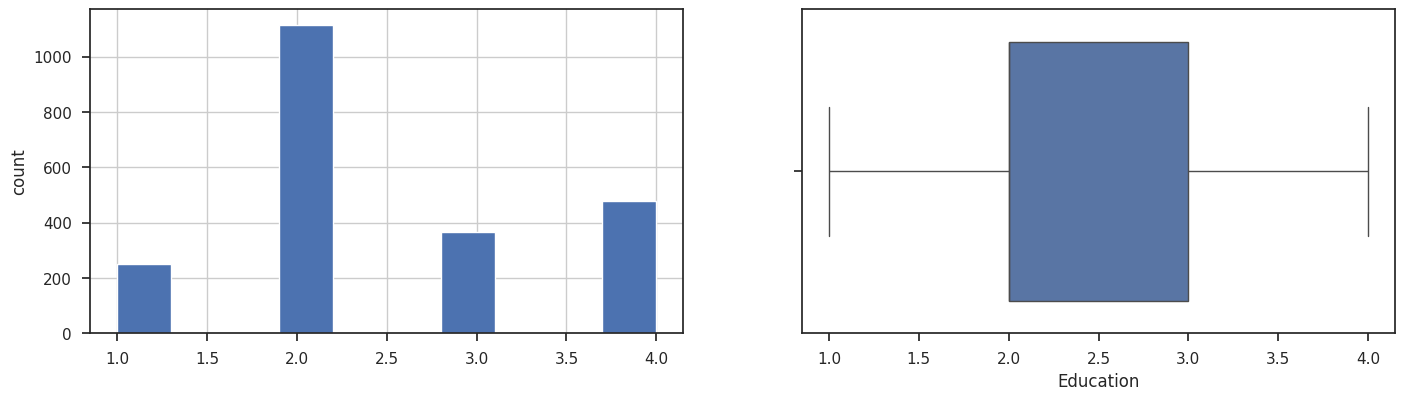

Income
Skew : 0.35


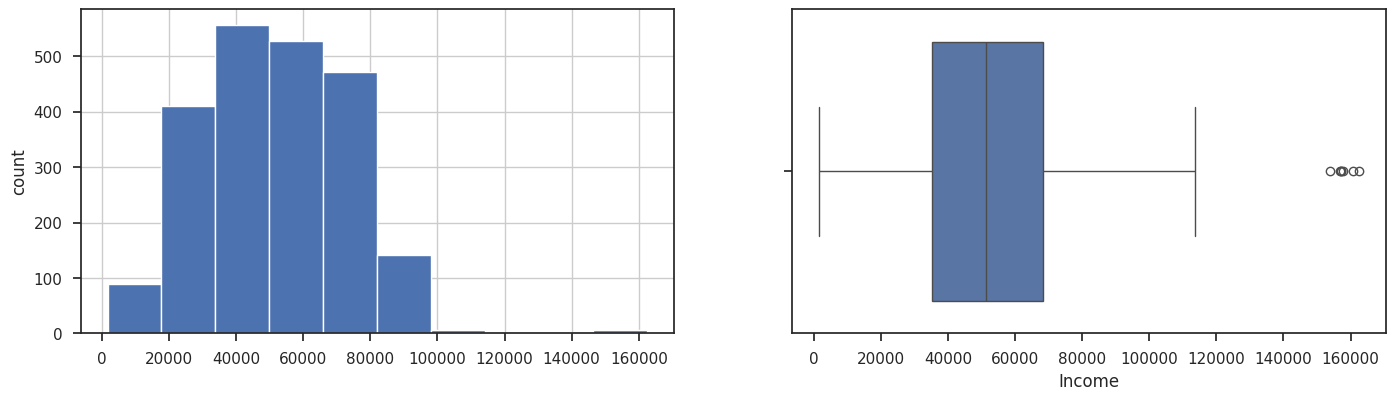

Wines
Skew : 1.17


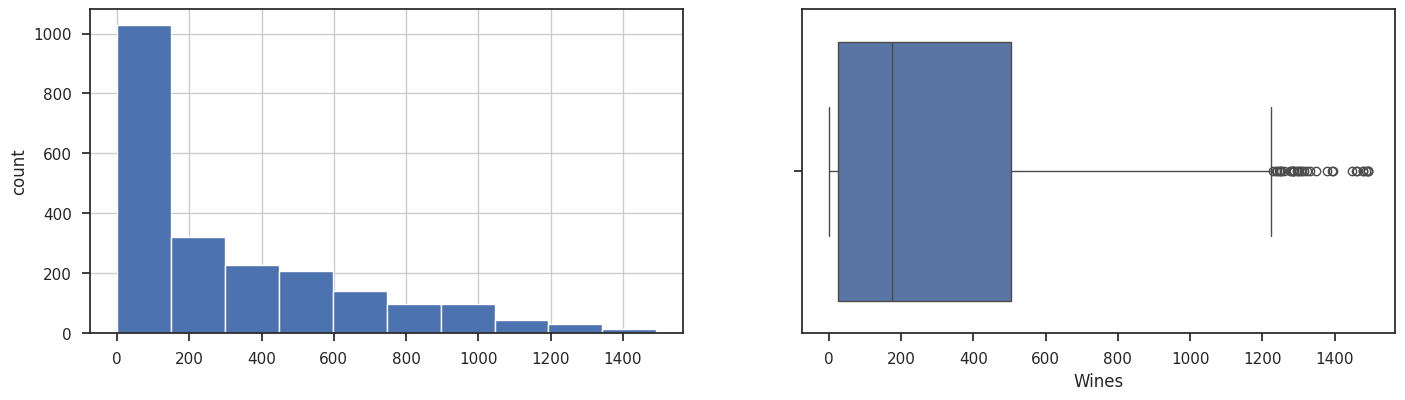

Fruits
Skew : 2.1


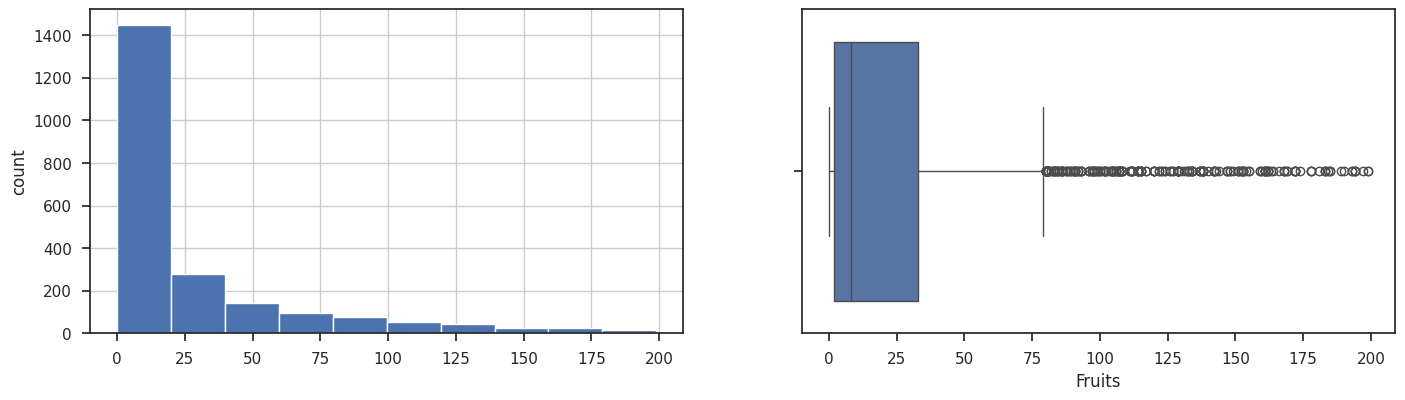

Meat
Skew : 2.03


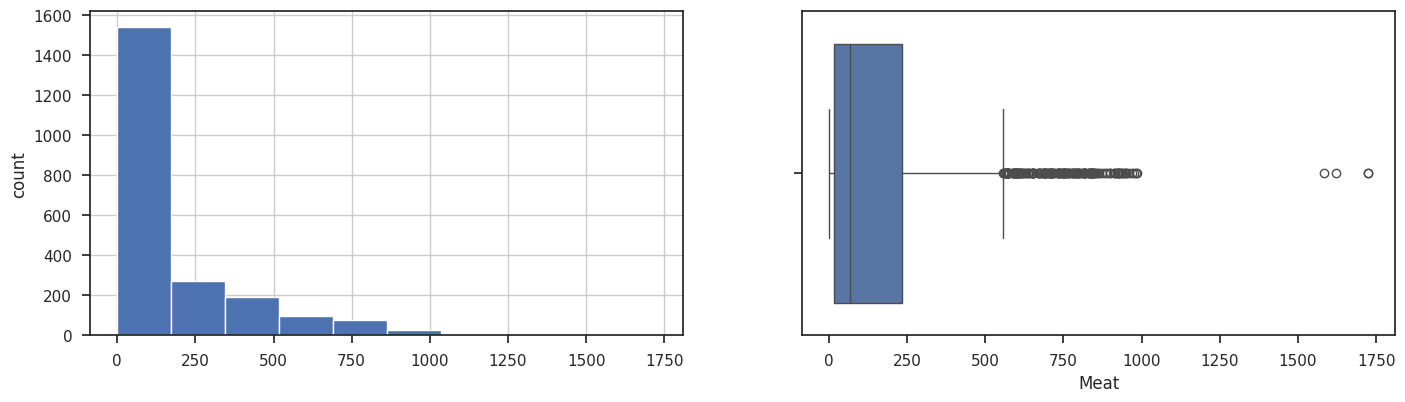

Fish
Skew : 1.92


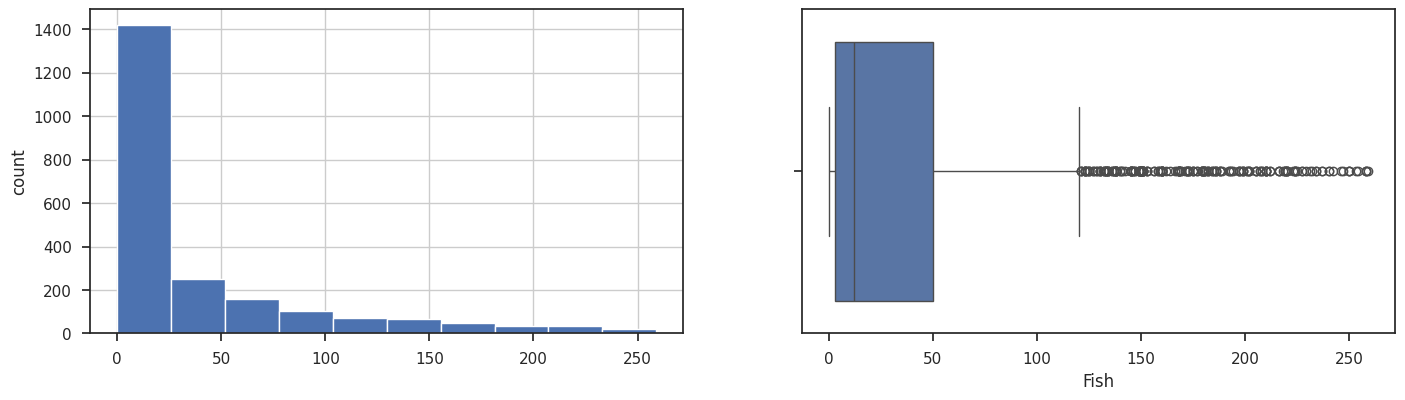

Sweets
Skew : 2.1


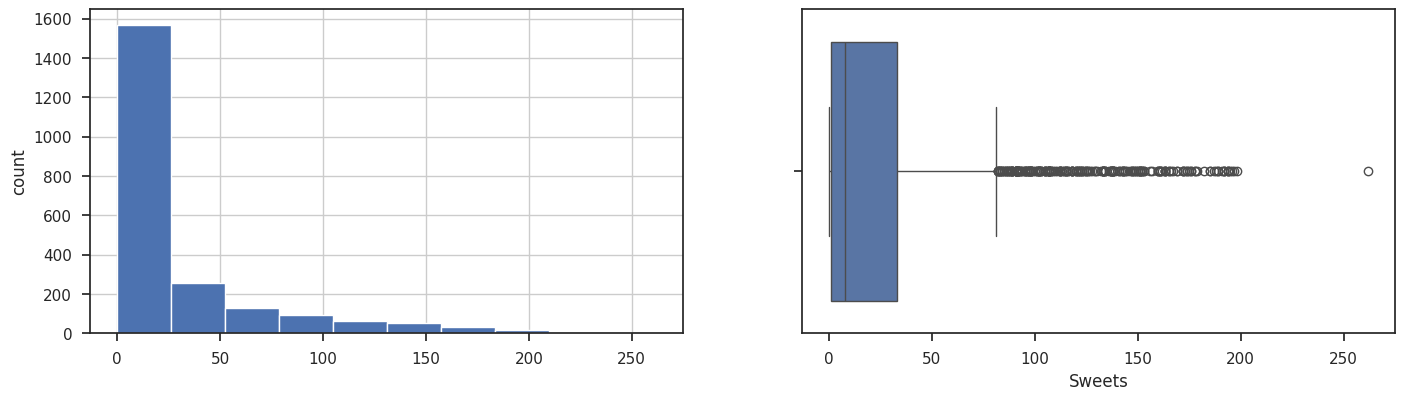

Gold
Skew : 1.84


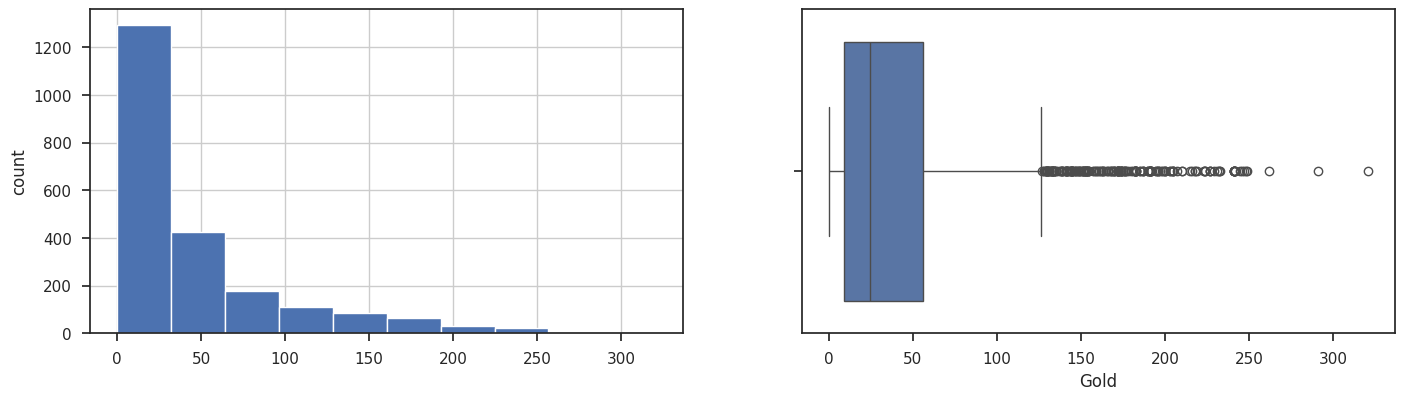

NumDealsPurchases
Skew : 2.42


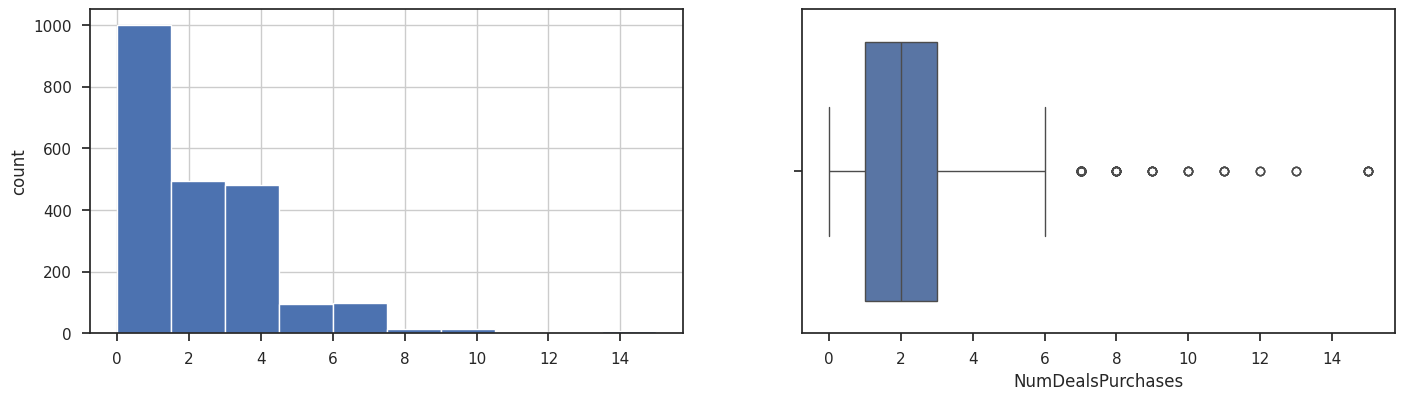

NumWebPurchases
Skew : 1.2


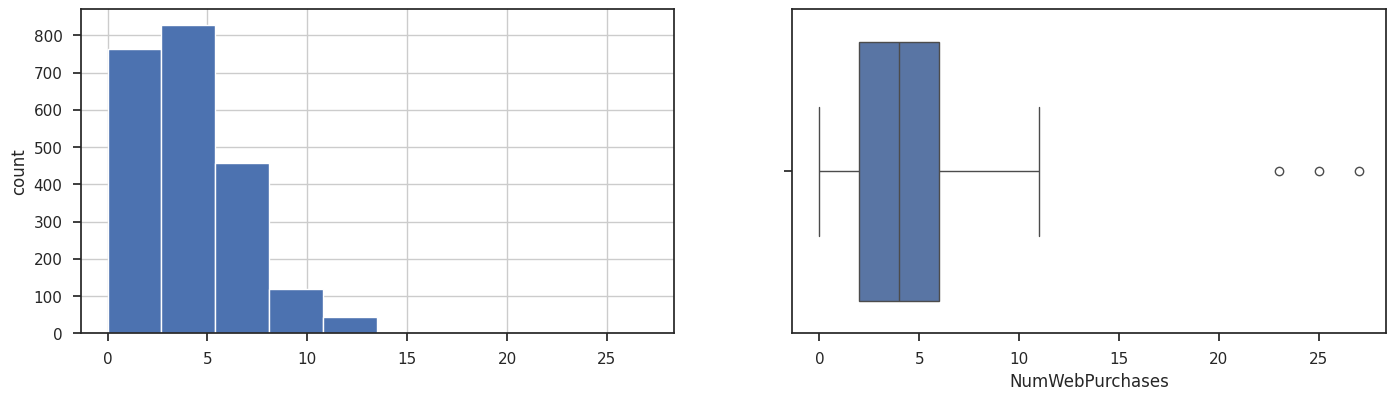

NumCatalogPurchases
Skew : 1.88


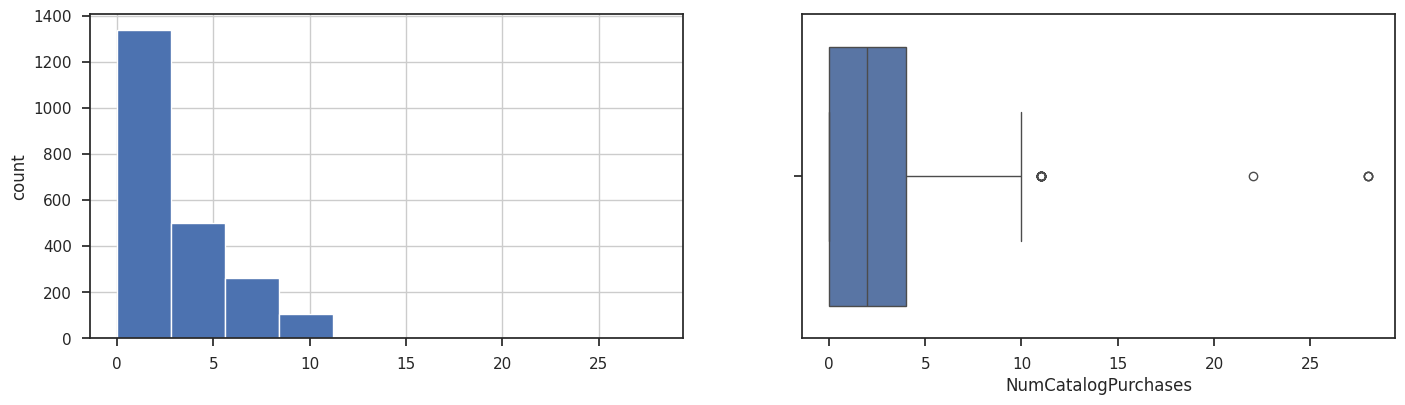

NumStorePurchases
Skew : 0.7


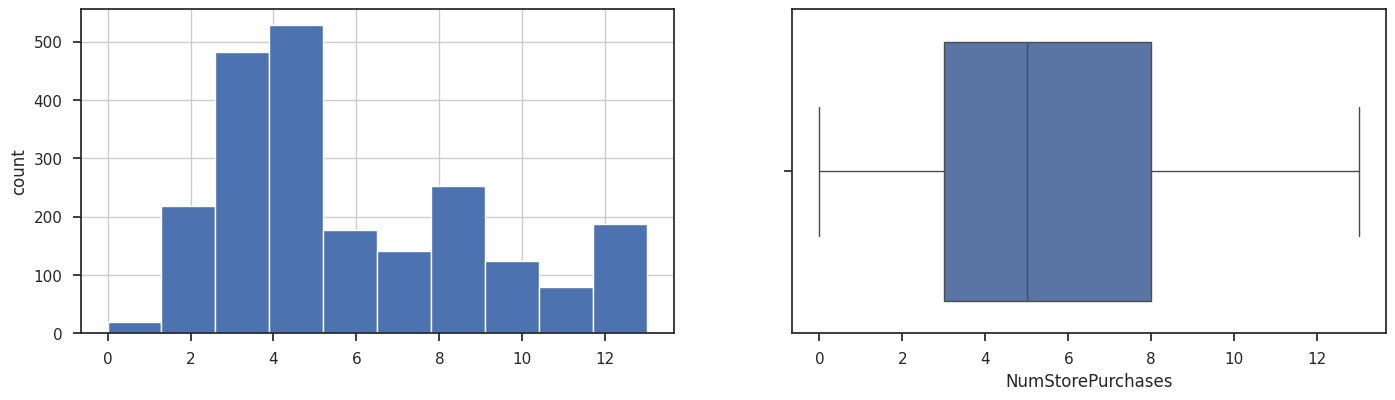

AcceptedCmp3
Skew : 3.27


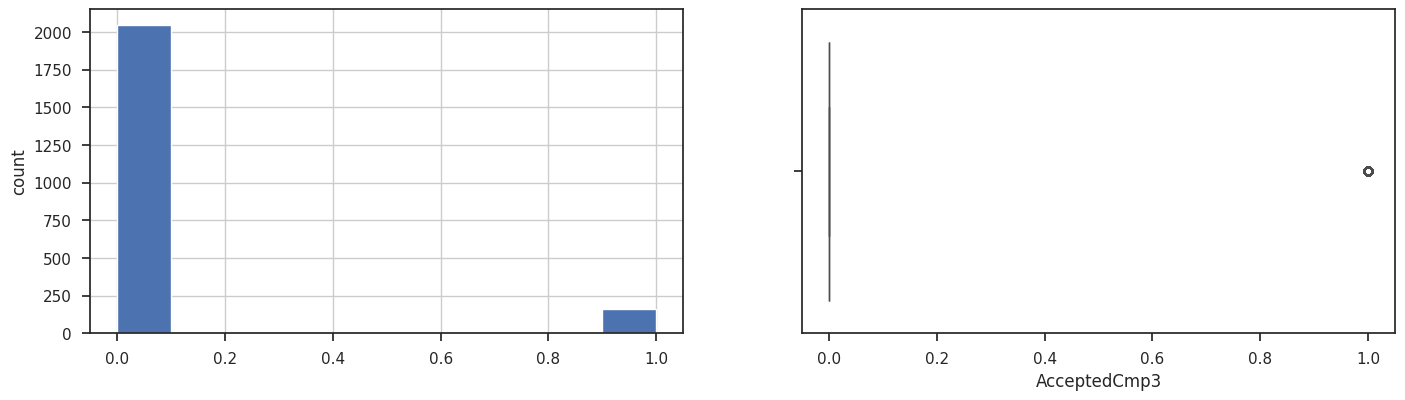

AcceptedCmp4
Skew : 3.25


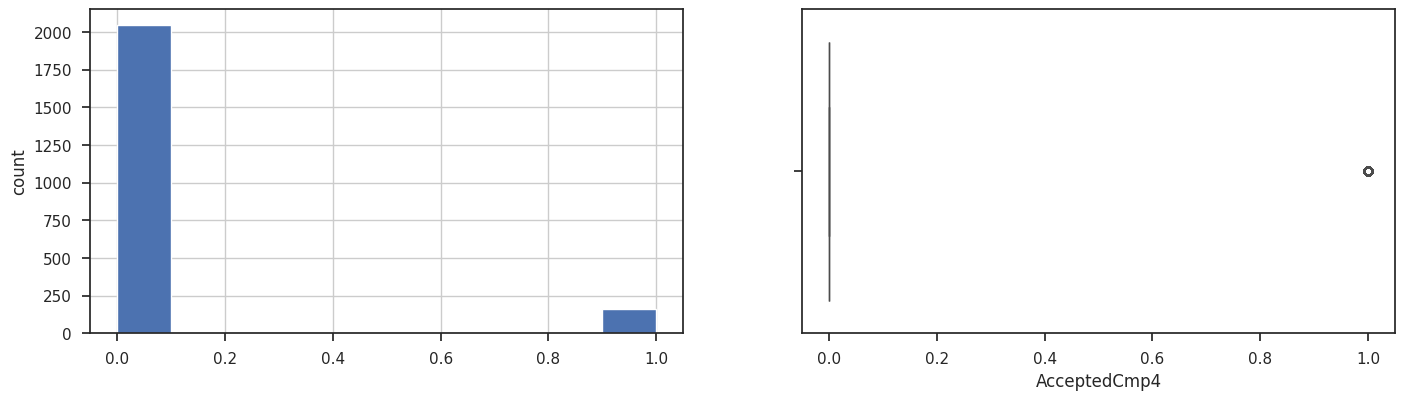

AcceptedCmp5
Skew : 3.29


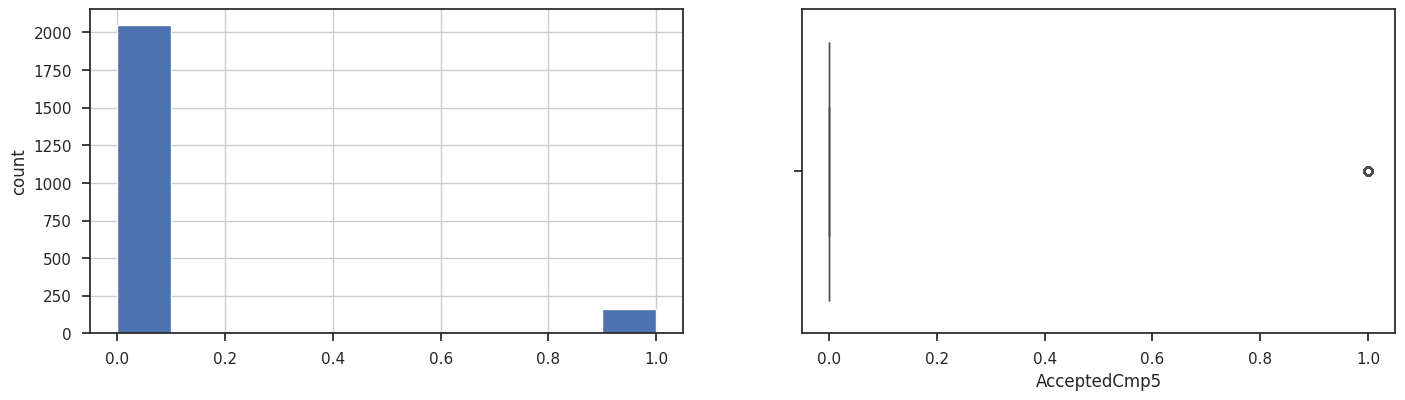

AcceptedCmp1
Skew : 3.56


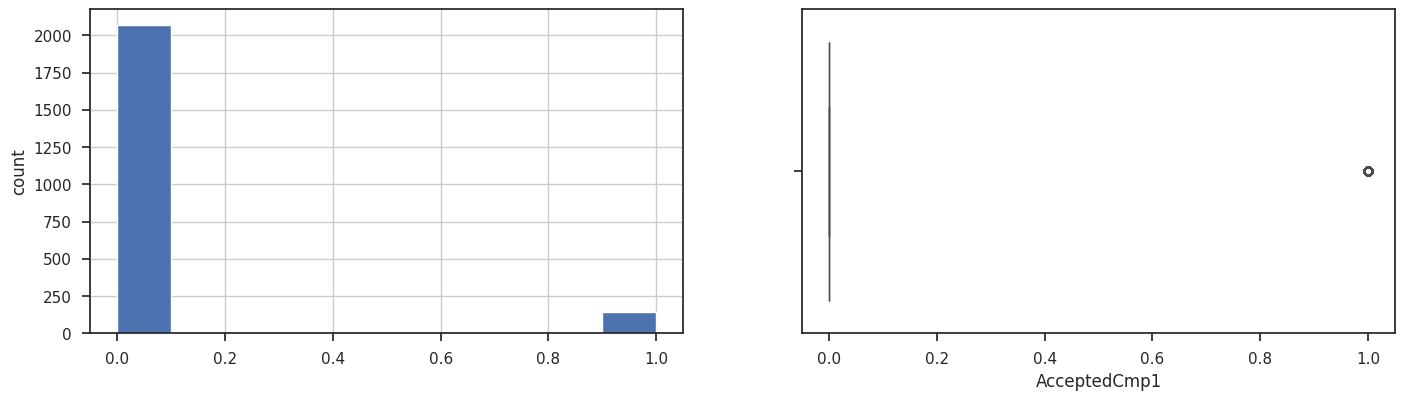

AcceptedCmp2
Skew : 8.57


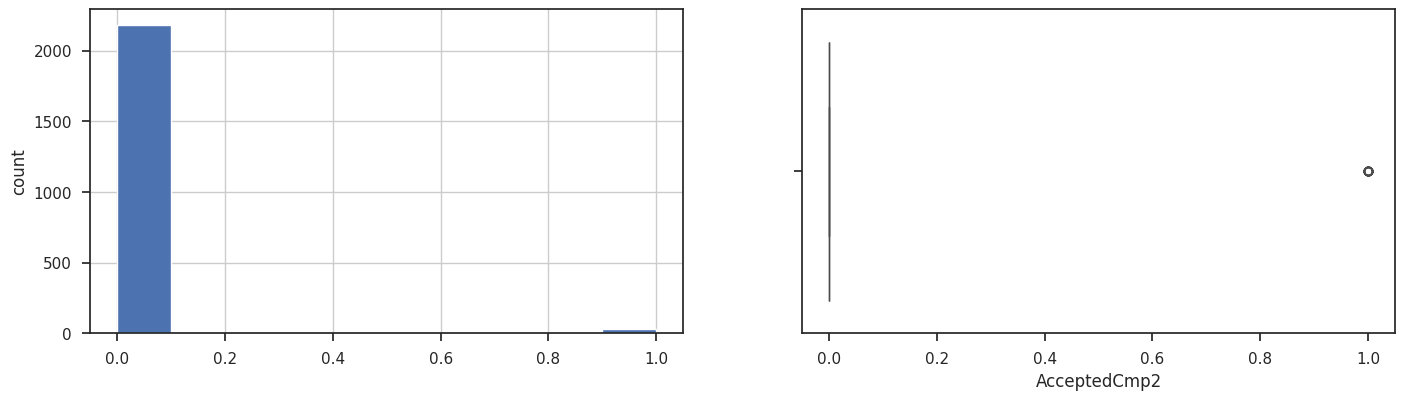

Complain
Skew : 10.38


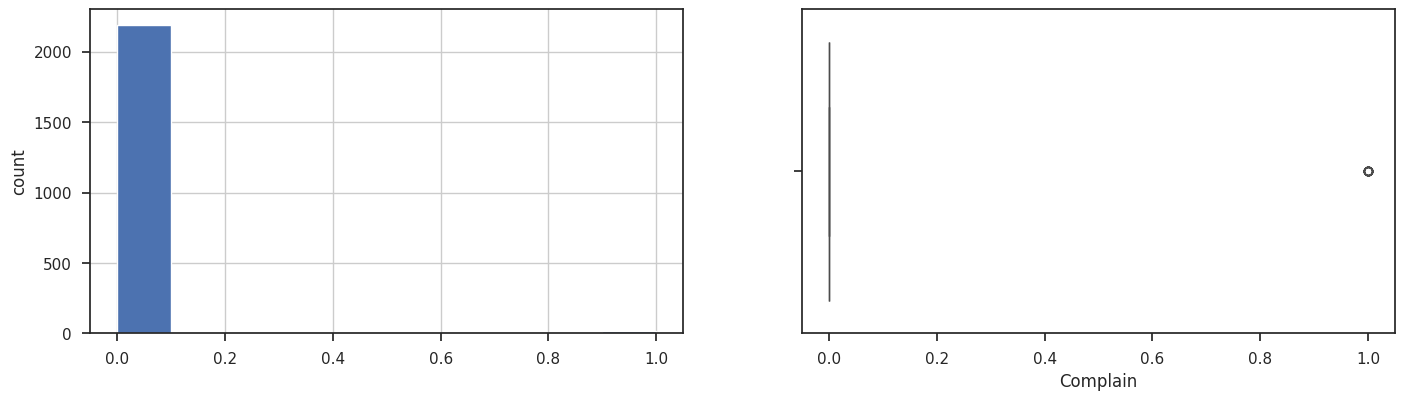

Response
Skew : 1.96


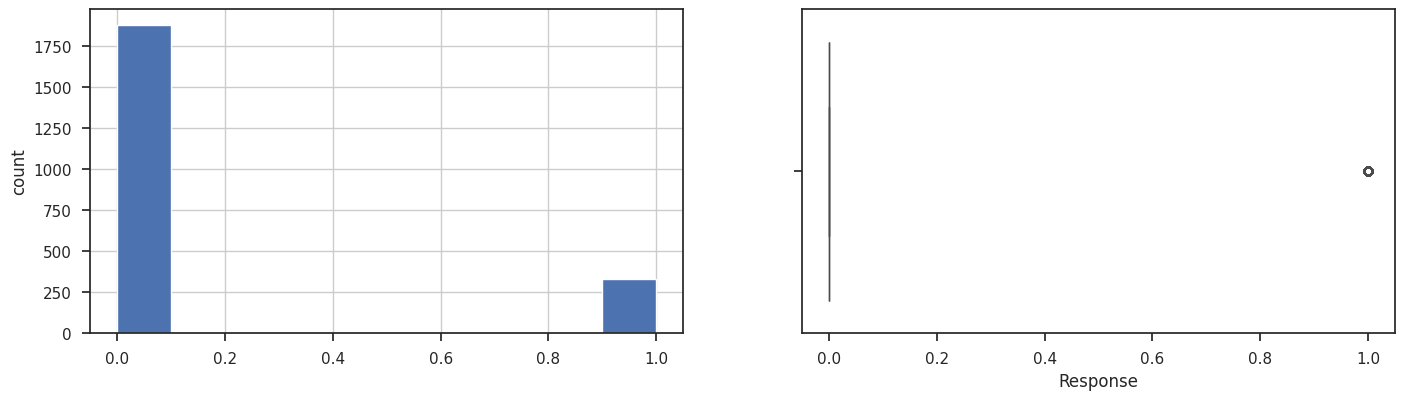

Customer_For
Skew : -0.02


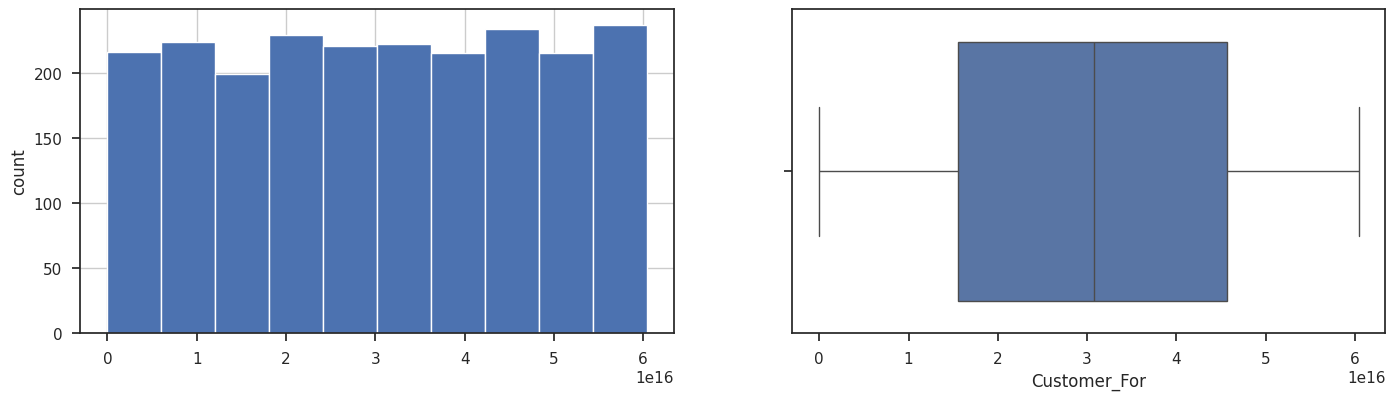

Age
Skew : 0.09


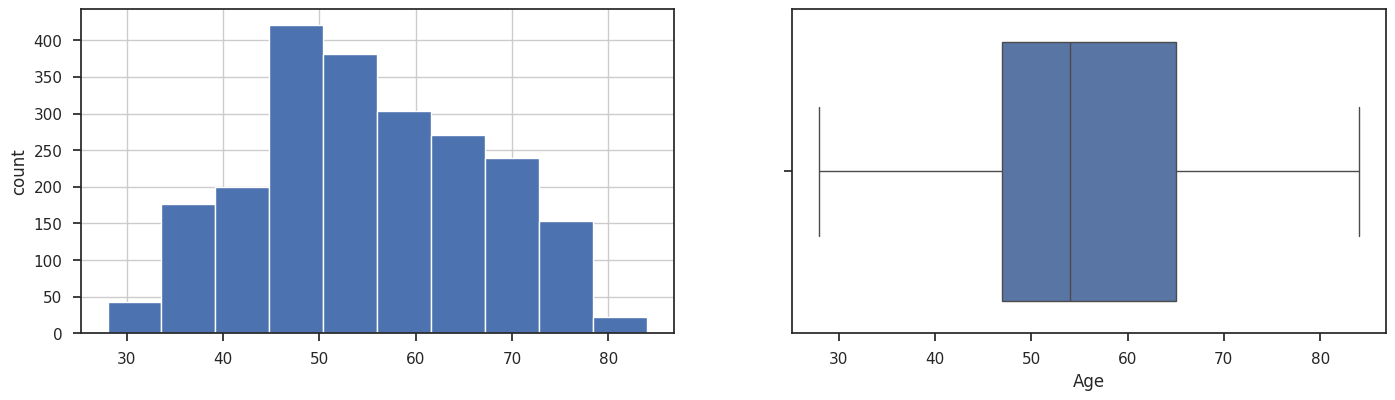

Spent
Skew : 0.86


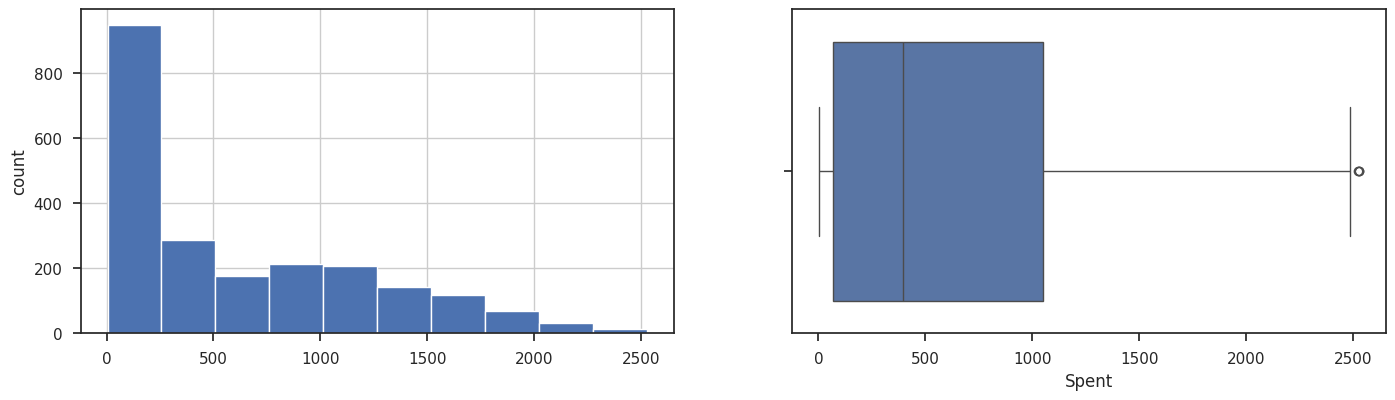

Family_Size
Skew : 0.08


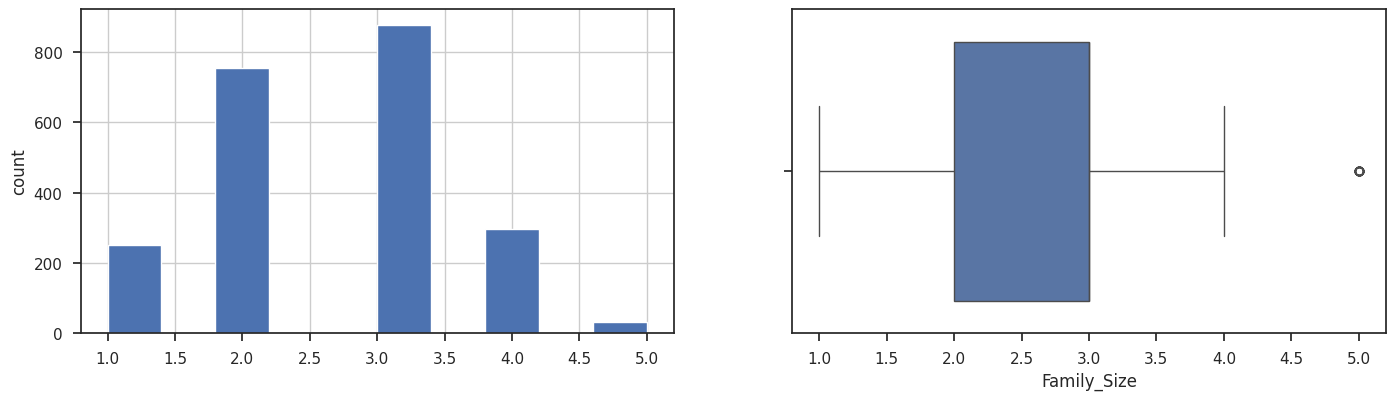

In [ ]:
# complete the BELOW code by filling the blanks, before running the cell to avoid any errors

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist()

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
data_copy = data.copy()
data_copy.head()

Education  Income   Wines  Fruits  Meat  Fish  Sweets  Gold  \
0      2      58138.0   635     88     546   172    88     88    
1      2      46344.0    11      1       6     2     1      6    
2      2      71613.0   426     49     127   111    21     42    
3      2      26646.0    11      4      20    10     3      5    
4      4      58293.0   173     43     118    46    27     15    

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0          3                 8                 10                   4           
1          2                 1                  1                   2           
2          1                 8                  2                  10           
3          2                 2                  0                   4           
4          5                 5                  3                   6           

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0        0             0             0             0             0        
1        0             0             0             0             0        
2        0             0             0             0             0        
3        0             0             0             0             0        
4        0             0             0             0             0        

   Complain  Response    Customer_For     Age  Spent  Family_Size  
0      0         1     57283200000000000  67   1617        1       
1      0         0      9763200000000000  70     27        3       
2      0         0     26956800000000000  59    776        2       
3      0         0     12009600000000000  40     53        3       
4      0         0     13910400000000000  43    422        3

- Tranformed remaining two categorical variables (object type) to numerical
- Created a sopy of the dataset fo rnext processing
- Dropped weak variables based on observation made in correlation matrix
- Performed scaling to reduce the dimensionality using PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)  # Scale the data

# Convert the scaled features back to a DataFrame for easy viewing
scaled_features = pd.DataFrame(scaled_features, columns=data.columns)

print("Dataframe to be used for further modelling:")
scaled_features.head()

Dataframe to be used for further modelling:


Education   Income     Wines    Fruits     Meat      Fish     Sweets   \
0 -0.508051   0.287105  0.977660  1.552041  1.690293  2.453472  1.483713   
1 -0.508051  -0.260882 -0.872618 -0.637461 -0.718230 -0.651004 -0.634019   
2 -0.508051   0.913196  0.357935  0.570540 -0.178542  1.339513 -0.147184   
3 -0.508051  -1.176114 -0.872618 -0.561961 -0.655787 -0.504911 -0.585335   
4  1.586653   0.294307 -0.392257  0.419540 -0.218684  0.152508 -0.001133   

     Gold    NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0  0.852576      0.351030          1.426865           2.503607         
1 -0.733642     -0.168701         -1.126420          -0.571340         
2 -0.037254     -0.688432          1.426865          -0.229679         
3 -0.752987     -0.168701         -0.761665          -0.913000         
4 -0.559545      1.390492          0.332600           0.111982         

   NumStorePurchases  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0     -0.555814        -0.282048     -0.282981     -0.280175     -0.261914     
1     -1.171160        -0.282048     -0.282981     -0.280175     -0.261914     
2      1.290224        -0.282048     -0.282981     -0.280175     -0.261914     
3     -0.555814        -0.282048     -0.282981     -0.280175     -0.261914     
4      0.059532        -0.282048     -0.282981     -0.280175     -0.261914     

   AcceptedCmp2  Complain  Response  Customer_For     Age      Spent   \
0   -0.115258    -0.09552  2.375425    1.527721    1.018352  1.676245   
1   -0.115258    -0.09552 -0.420977   -1.189011    1.274785 -0.963297   
2   -0.115258    -0.09552 -0.420977   -0.206048    0.334530  0.280110   
3   -0.115258    -0.09552 -0.420977   -1.060584   -1.289547 -0.920135   
4   -0.115258    -0.09552 -0.420977   -0.951915   -1.033114 -0.307562   

   Family_Size  
0  -1.758359    
1   0.449070    
2  -0.654644    
3   0.449070    
4   0.449070

### **Dimensionality reduction using PCA**

In [ ]:
pca = PCA(n_components=4)
pca.fit(scaled_features)
#PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(["Education", "Age", "Income","Family_Size", "Spent", "NumDealsPurchases","NumWebPurchases","NumStorePurchases"]))
PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(["Education", "Income","Family_Size", "Spent"]))
PCA_df.describe().T

count      mean         std       min       25%       50%    \
Education    2212.0 -2.152186e-16  2.668688 -4.061836 -2.448100 -0.759292   
Income       2212.0  8.030546e-18  1.371339 -3.984641 -0.673810 -0.104670   
Family_Size  2212.0  5.781993e-17  1.340127 -4.779821 -0.892338 -0.131254   
Spent        2212.0  1.927331e-17  1.187227 -3.517360 -0.782780 -0.091176   

                75%       max    
Education    2.124064  8.462112  
Income       0.471410  8.365089  
Family_Size  0.879203  5.214210  
Spent        0.687819  5.754046

There are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
- **Dimensionality reduction** is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.
- **Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.
- I will use these steps to perform the operation:
    1. Dimensionality reduction with PCA
    2. Plotting the reduced dataframe
- Dimensionality reduction with PCA: I will be reducing the dimensions to 3.

In [ ]:
PCA_df1 = PCA_df.copy()
PCA_df2 = PCA_df.copy()
PCA_df1.head()
PCA_df2.head()

Education   Income   Family_Size    Spent 
0  4.595348  -1.227820   0.303915    1.811144
1 -2.570696   0.004227  -0.454755   -1.173305
2  1.425974  -1.056606   0.483036   -0.709014
3 -2.734552  -0.387310  -0.966047   -0.139823
4 -0.448761  -0.088062   0.902981   -0.660062

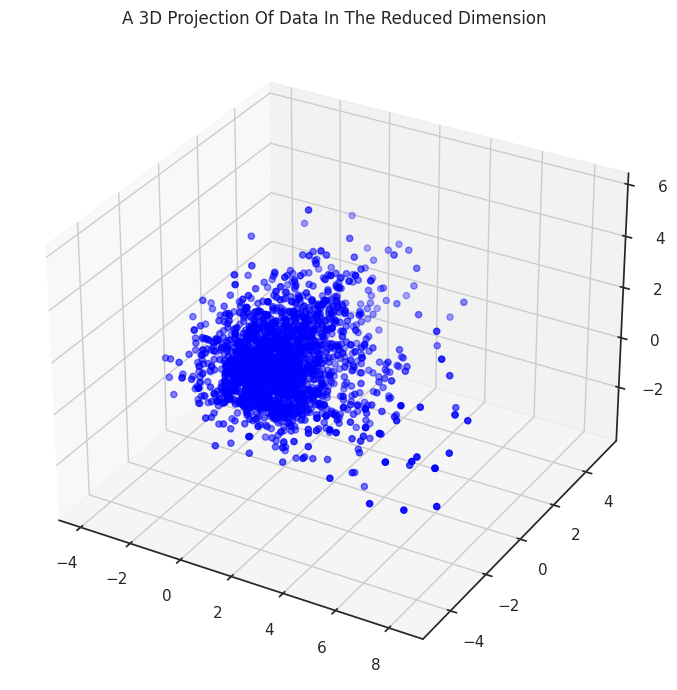

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["Income"]
y =PCA_df["Family_Size"]
z =PCA_df["Spent"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### **K-Means**
- Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.
- We will do this in 3 steps:
   - Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
   - Run for a range of Ks and store SSE for each run
   - Plot the SSE vs K and plot the elbow curve

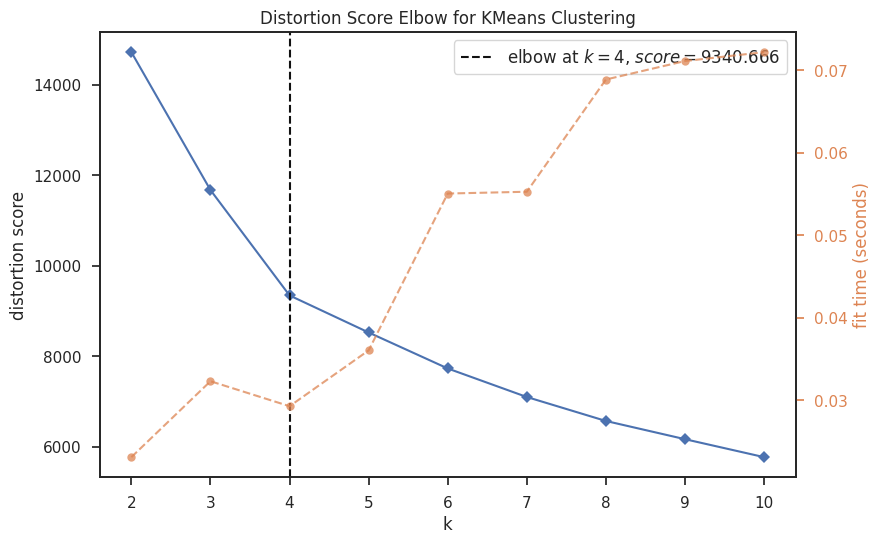

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_df)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
PCA_df.info()
PCA_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Education    2212 non-null   float64
 1   Income       2212 non-null   float64
 2   Family_Size  2212 non-null   float64
 3   Spent        2212 non-null   float64
dtypes: float64(4)
memory usage: 69.2 KB


Education   Income   Family_Size    Spent 
0   4.595348  -1.227820   0.303915    1.811144
1  -2.570696   0.004227  -0.454755   -1.173305
2   1.425974  -1.056606   0.483036   -0.709014
3  -2.734552  -0.387310  -0.966047   -0.139823
4  -0.448761  -0.088062   0.902981   -0.660062
5   0.583905  -0.034085   1.028878   -1.058377
6   0.651787  -1.013629   1.006019    0.733725
7  -2.122398   0.260614   0.032947   -0.038569
8  -2.337796   1.240253  -0.831284    0.563175
9  -3.414809   1.121523  -0.693167    0.012048
10 -2.638549  -0.868833  -1.133740    1.203071
11  2.757718  -2.722442  -1.135514   -1.121218
12 -1.198487   0.555976   1.185049   -1.215163
13 -2.674618  -0.633465  -1.323557    1.054562
14  4.935609   3.047993  -0.941985   -0.264988
15 -2.521800  -0.064243   0.379271    0.777654
16 -0.571554  -0.853721   0.614242    0.108363
17  4.283116   0.927315   1.738378   -0.273901
18 -1.819117  -1.180617  -0.990736    1.461495
19 -0.797588  -1.051533  -0.490478    1.106616

In [ ]:
# Apply the K-Means algorithm
kmeans = KMeans(n_clusters=4, random_state=1)

 # Fit the kmeans function on the pca components
kmeans.fit(PCA_df)    # Complete the code
# Adding predicted labels to the original data and the copied data
# Save the predictions on the pca components from K-Means
PCA_df['Labels'] = kmeans.labels_ # Complete the code
data['Labels'] = kmeans.labels_  # Complete the code
data.Labels.value_counts()

Labels
0    1019
1     562
3     486
2     145
Name: count, dtype: int64

In [ ]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median','group_3 Median']

df_kmeans.T

group_0 Mean  group_1 Mean  group_2 Mean  group_3 Mean  \
Education            2.369971e+00  2.738434e+00  2.682759e+00  2.374486e+00   
Income               3.513831e+04  5.635031e+04  8.060895e+04  7.360036e+04   
Wines                4.102355e+01  4.300249e+02  9.183793e+02  5.322099e+02   
Fruits               5.103042e+00  1.928114e+01  4.763448e+01  7.262963e+01   
Meat                 2.246614e+01  1.296512e+02  4.433241e+02  4.309280e+02   
Fish                 7.115800e+00  2.647687e+01  7.293793e+01  1.040576e+02   
Sweets               5.167812e+00  1.980961e+01  5.637241e+01  7.253909e+01   
Gold                 1.517566e+01  5.735765e+01  7.434483e+01  7.959877e+01   
NumDealsPurchases    1.950932e+00  3.967972e+00  1.193103e+00  1.545267e+00   
NumWebPurchases      2.065751e+00  6.241993e+00  5.503448e+00  5.415638e+00   
NumCatalogPurchases  5.574092e-01  2.937722e+00  6.151724e+00  5.761317e+00   
NumStorePurchases    3.215898e+00  7.524911e+00  8.158621e+00  8.549383e+00   
AcceptedCmp3         7.262022e-02  6.227758e-02  1.931034e-01  5.349794e-02   
AcceptedCmp4         1.079490e-02  1.174377e-01  5.103448e-01  2.674897e-02   
AcceptedCmp5         0.000000e+00  7.117438e-03  8.000000e-01  8.436214e-02   
AcceptedCmp1         9.813543e-04  2.491103e-02  5.931034e-01  8.436214e-02   
AcceptedCmp2         1.962709e-03  0.000000e+00  1.862069e-01  0.000000e+00   
Complain             1.079490e-02  1.067616e-02  6.896552e-03  4.115226e-03   
Response             8.537782e-02  1.192171e-01  7.310345e-01  1.502058e-01   
Customer_For         2.698368e+16  3.597991e+16  3.247627e+16  3.122347e+16   
Age                  5.239745e+01  5.949288e+01  5.353103e+01  5.609259e+01   
Spent                9.605201e+01  6.826014e+02  1.612993e+03  1.291963e+03   
Family_Size          2.859666e+00  2.893238e+00  1.827586e+00  1.915638e+00   

                     group_0 Median  group_1 Median  group_2 Median  \
Education             2.000000e+00    3.000000e+00    2.000000e+00    
Income                3.452900e+04    5.712450e+04    8.232600e+04    
Wines                 2.100000e+01    3.780000e+02    9.680000e+02    
Fruits                2.000000e+00    1.150000e+01    2.800000e+01    
Meat                  1.400000e+01    1.065000e+02    4.170000e+02    
Fish                  3.000000e+00    1.500000e+01    5.100000e+01    
Sweets                2.000000e+00    1.100000e+01    3.800000e+01    
Gold                  1.000000e+01    3.900000e+01    4.800000e+01    
NumDealsPurchases     2.000000e+00    4.000000e+00    1.000000e+00    
NumWebPurchases       2.000000e+00    6.000000e+00    5.000000e+00    
NumCatalogPurchases   0.000000e+00    2.000000e+00    6.000000e+00    
NumStorePurchases     3.000000e+00    7.000000e+00    8.000000e+00    
AcceptedCmp3          0.000000e+00    0.000000e+00    0.000000e+00    
AcceptedCmp4          0.000000e+00    0.000000e+00    1.000000e+00    
AcceptedCmp5          0.000000e+00    0.000000e+00    1.000000e+00    
AcceptedCmp1          0.000000e+00    0.000000e+00    1.000000e+00    
AcceptedCmp2          0.000000e+00    0.000000e+00    0.000000e+00    
Complain              0.000000e+00    0.000000e+00    0.000000e+00    
Response              0.000000e+00    0.000000e+00    1.000000e+00    
Customer_For          2.574720e+16    3.866400e+16    3.481920e+16    
Age                   5.100000e+01    5.900000e+01    5.200000e+01    
Spent                 6.300000e+01    6.120000e+02    1.674000e+03    
Family_Size           3.000000e+00    3.000000e+00    2.000000e+00    

                     group_3 Median  
Education             2.000000e+00   
Income                7.375400e+04   
Wines                 4.830000e+02   
Fruits                6.500000e+01   
Meat                  3.980000e+02   
Fish                  9.300000e+01   
Sweets                6.000000e+01   
Gold                  5.900000e+01   
NumDealsPurchases     1.000000e+00   
NumWebPurchases       5.000000e+00   
N

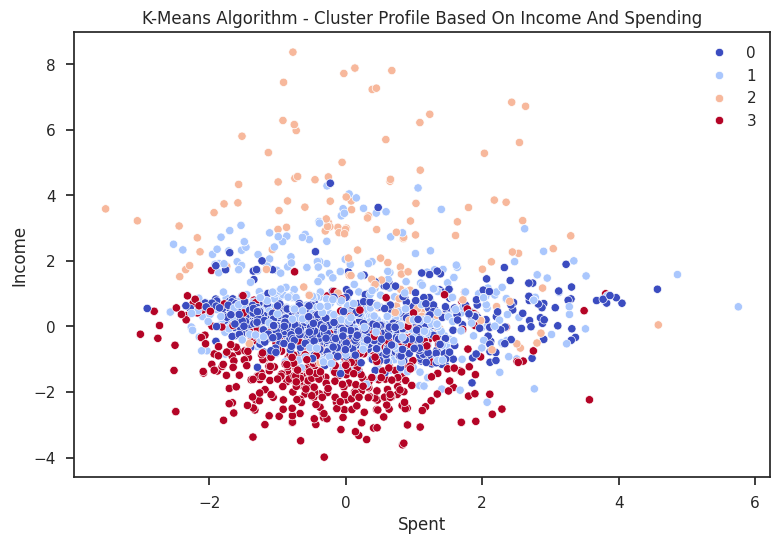

In [ ]:
pl = sns.scatterplot(data = PCA_df, x=PCA_df["Spent"], y=PCA_df["Income"],hue=PCA_df["Labels"],palette='coolwarm' )
pl.set_title("K-Means Algorithm - Cluster Profile Based On Income And Spending")
plt.legend()
plt.show()

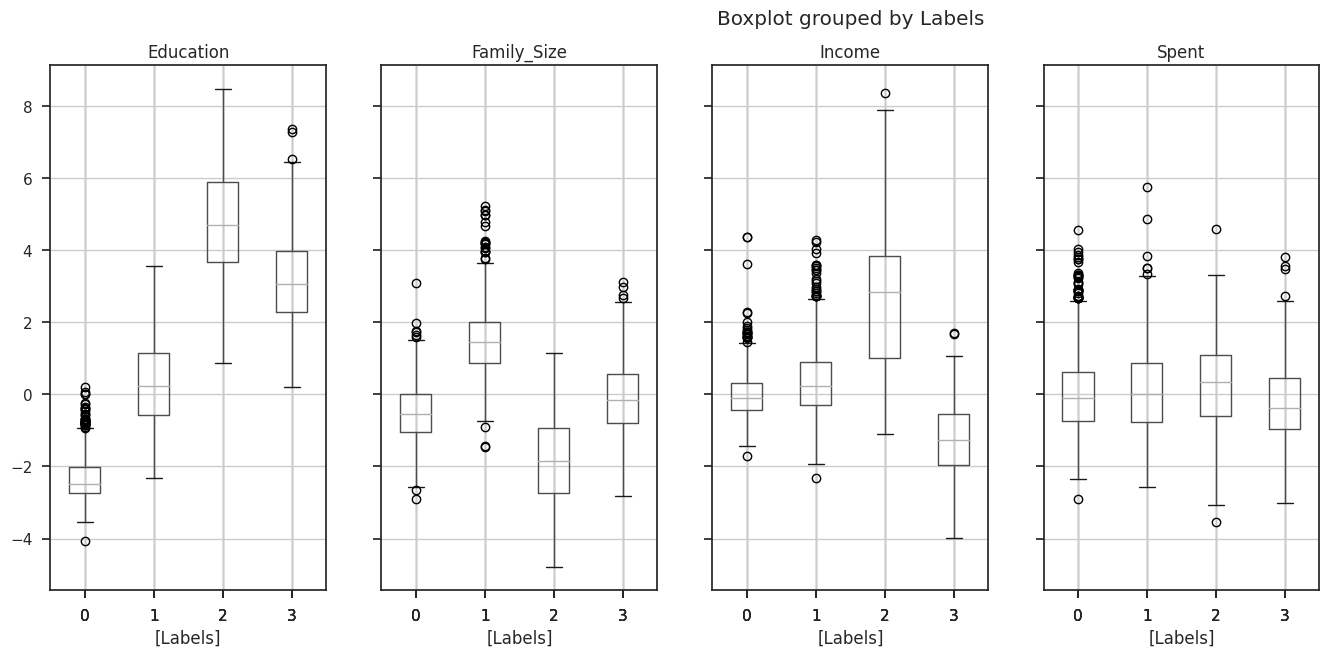

In [ ]:
# Visualizing different features w.r.t K-means labels
PCA_df.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))
plt.show()

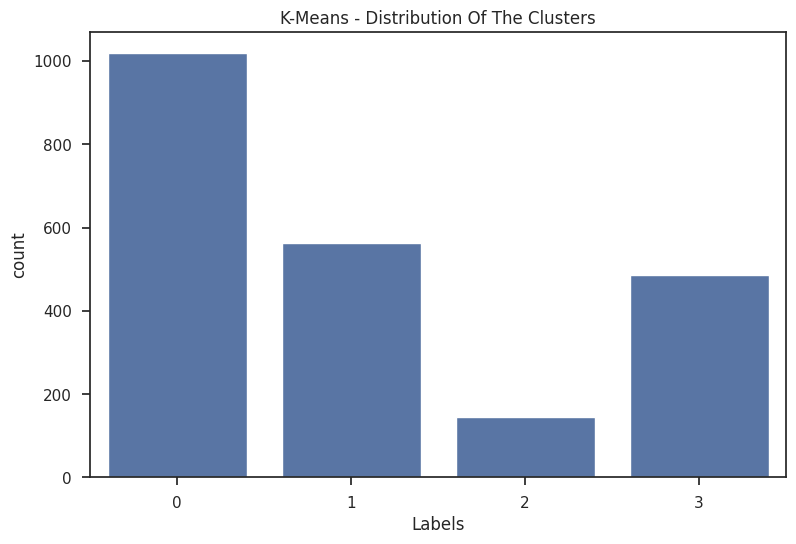

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=PCA_df["Labels"])
pl.set_title("K-Means - Distribution Of The Clusters")
plt.show()

### ***Agglomerative Clustering model ***

A hierarchical algorithm that uses a bottom-up approach. Each data point is initially considered a “cluster.” The algorithm proceeds by successively merging clusters using a selected linkage criterion.

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
AC_df = AC.fit_predict(PCA_df)
PCA_df["Labels"] = AC_df
#Adding the Clusters feature to the orignal dataframe.



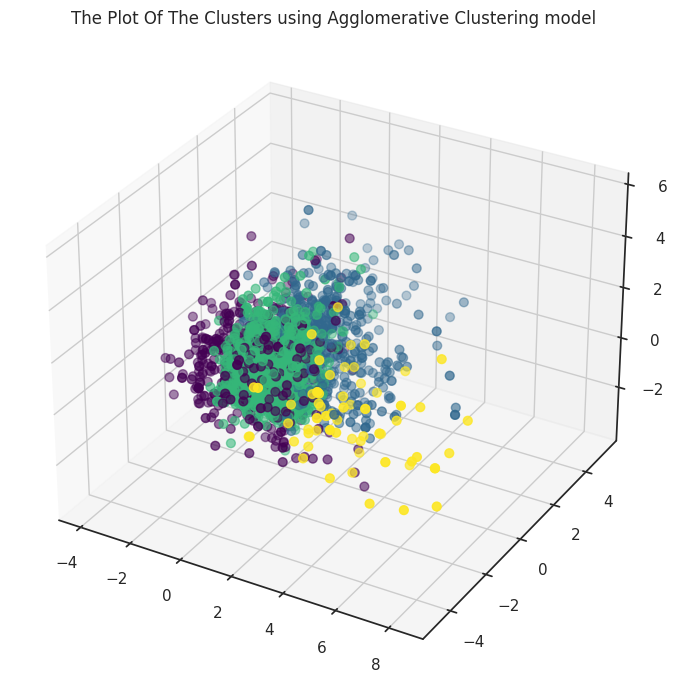

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Labels"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters using Agglomerative Clustering model")
plt.show()

## See Model evaluationbelow:

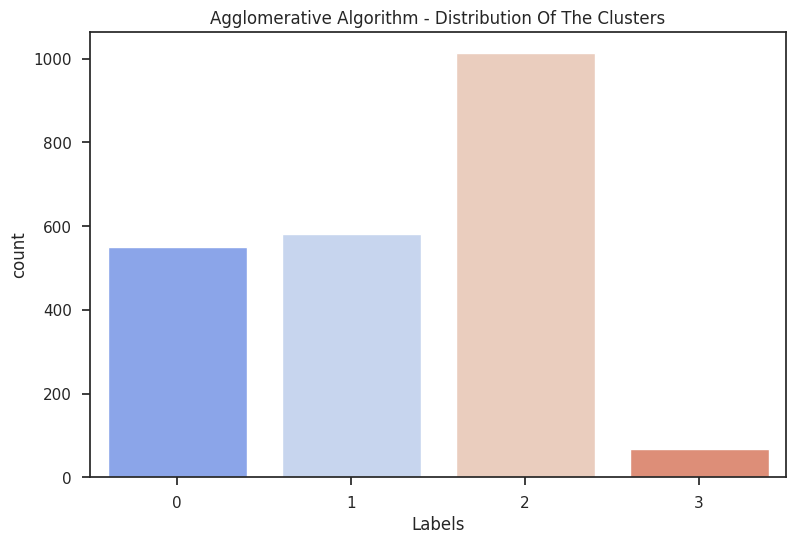

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=PCA_df["Labels"], palette='coolwarm')
pl.set_title("Agglomerative Algorithm - Distribution Of The Clusters")
plt.show()

In [ ]:
PCA_df.Labels.value_counts()

Labels
2    1013
1     582
0     549
3      68
Name: count, dtype: int64

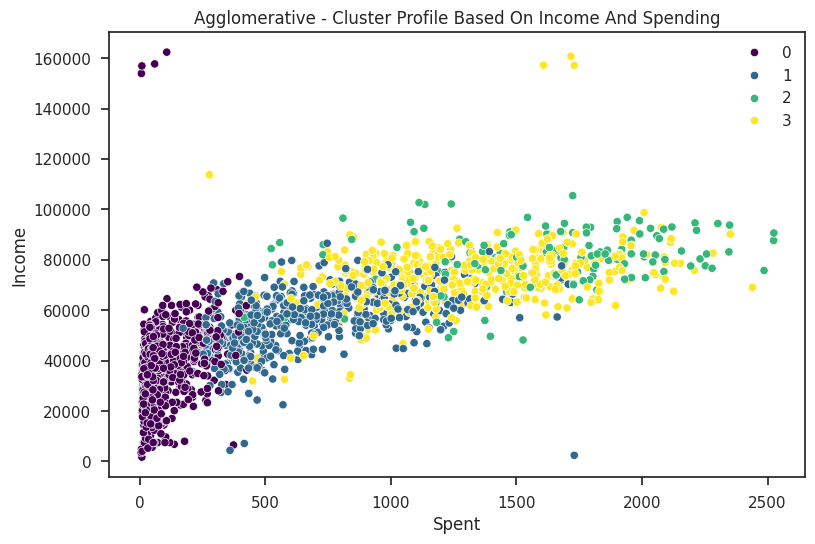

In [ ]:
# Add the 'Clusters' column to the 'data' DataFrame
PCA_df["Labels"] = AC_df
pal = "viridis"  # Or any other palette you prefer, e.g., "Set1", "coolwarm", etc.
# Now you can plot using 'data'
pl = sns.scatterplot(data=data, x=data["Spent"], y=data["Income"], hue=data["Labels"], palette=pal)
pl.set_title("Agglomerative - Cluster Profile Based On Income And Spending")
plt.legend()
plt.show()

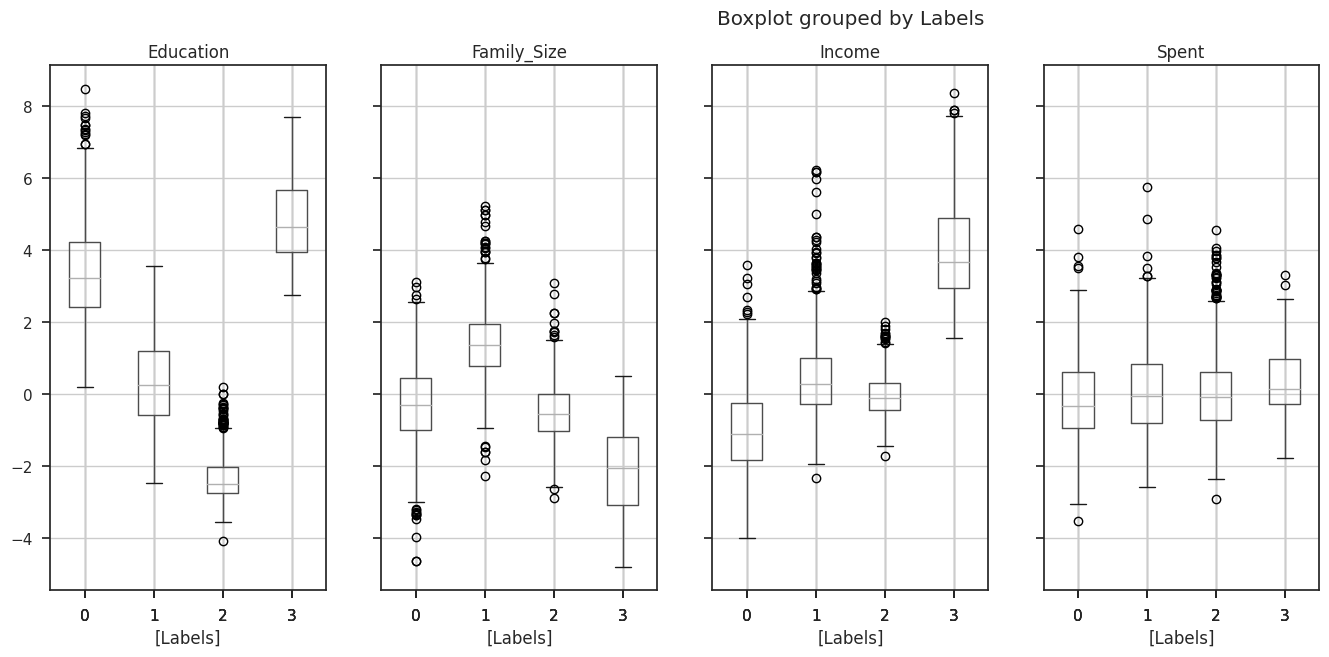

In [ ]:
PCA_df.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))
plt.show()

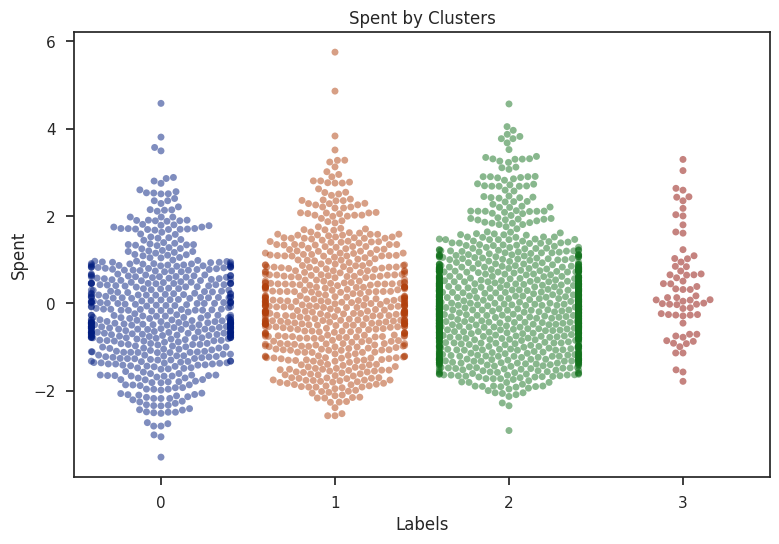

In [ ]:
plt.figure()
# Assuming 'data' is the DataFrame with the 'Clusters' column
pl = sns.swarmplot(x=PCA_df["Labels"], y=PCA_df["Spent"], palette='dark', alpha=0.5)
pl.set_title("Spent by Clusters")
plt.show()

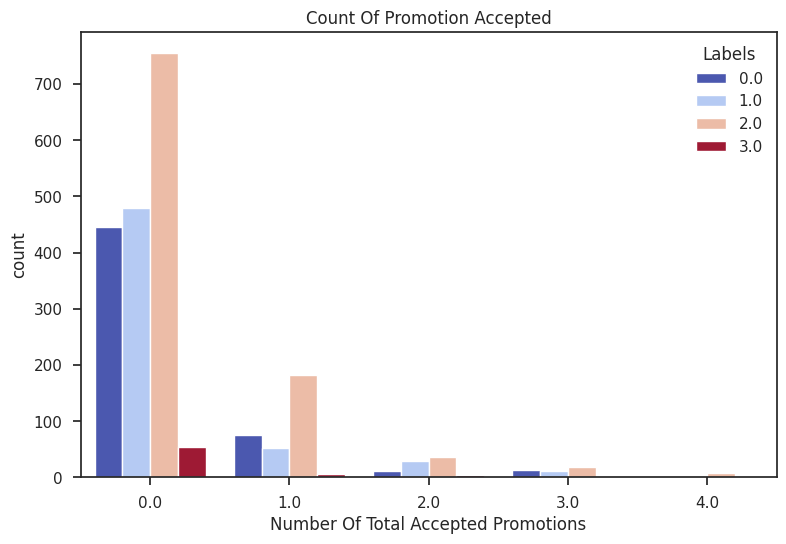

In [ ]:
#Creating a feature to get a sum of accepted promotions
# Verify the correct column names in your DataFrame
data["Total_Promos"] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + \
                        data['AcceptedCmp3'] + data['AcceptedCmp4'] + \
                        data['AcceptedCmp5']

plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=PCA_df["Labels"], palette='coolwarm')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

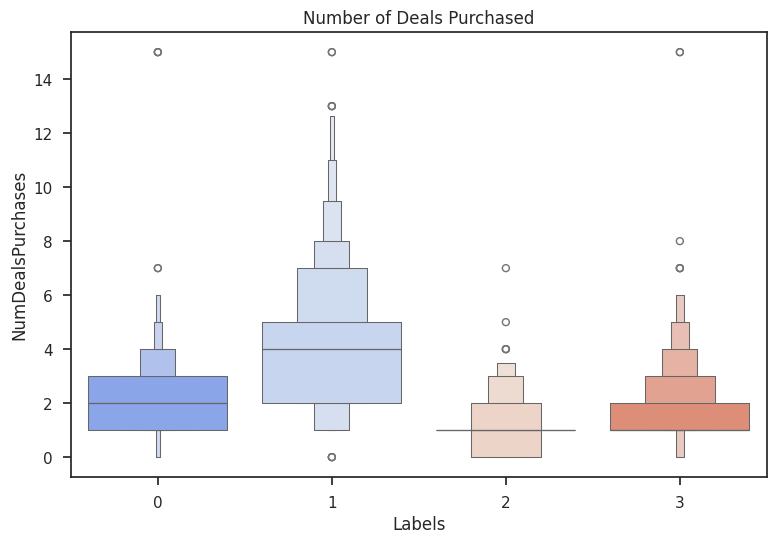

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Labels"], palette='coolwarm')
pl.set_title("Number of Deals Purchased")
plt.show()

## DBSCAN

- A density-based clustering algorithm that groups data points together based on their proximity to one another.
- DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.
- It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

In [ ]:
from sklearn.cluster import DBSCAN
DP = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
DP_df = DP.fit_predict(PCA_df1)
PCA_df1["Labels"] = DP_df
PCA_df1["Labels"] = PCA_df1.index.map(lambda x: DP_df[x] if x < len(DP_df) else -1)


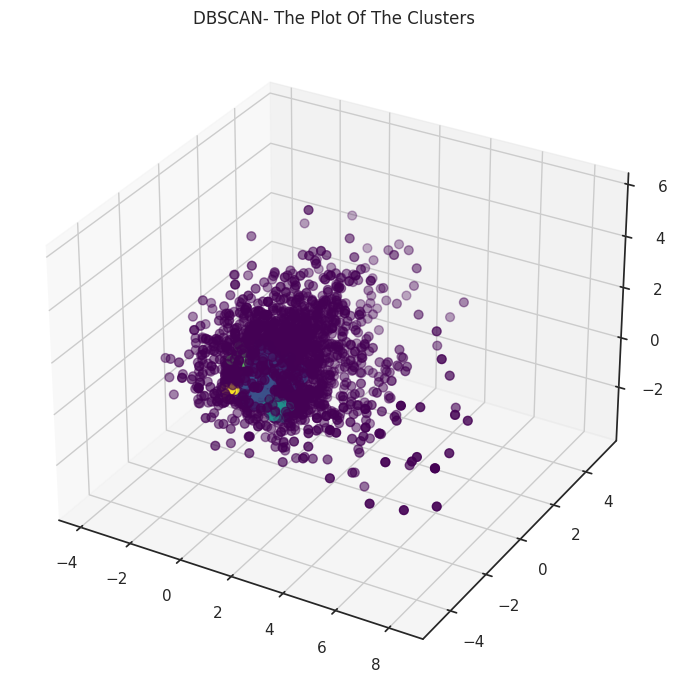

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df1["Labels"], marker='o', cmap = 'viridis')
ax.set_title("DBSCAN- The Plot Of The Clusters")
plt.show()

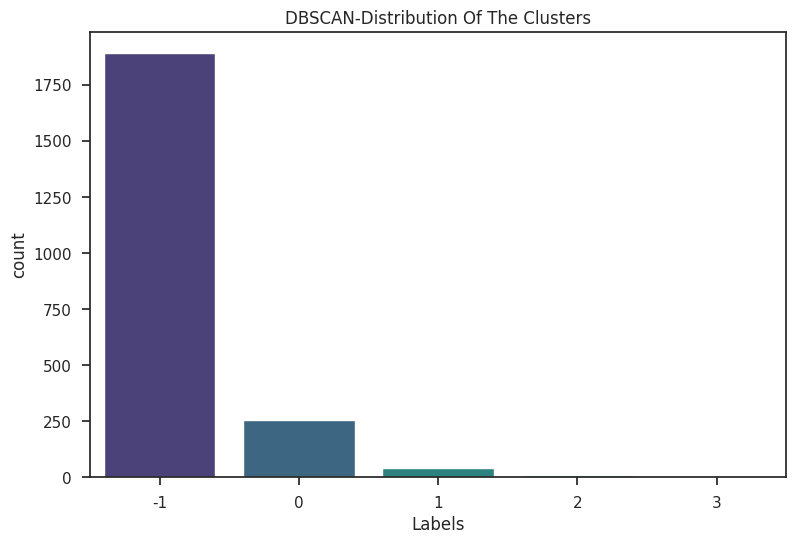

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=PCA_df1["Labels"], palette=pal)
pl.set_title("DBSCAN-Distribution Of The Clusters")
plt.show()

In [ ]:
PCA_df1.Labels.value_counts()

Labels
-1    1892
 0     258
 1      43
 2      11
 3       8
Name: count, dtype: int64

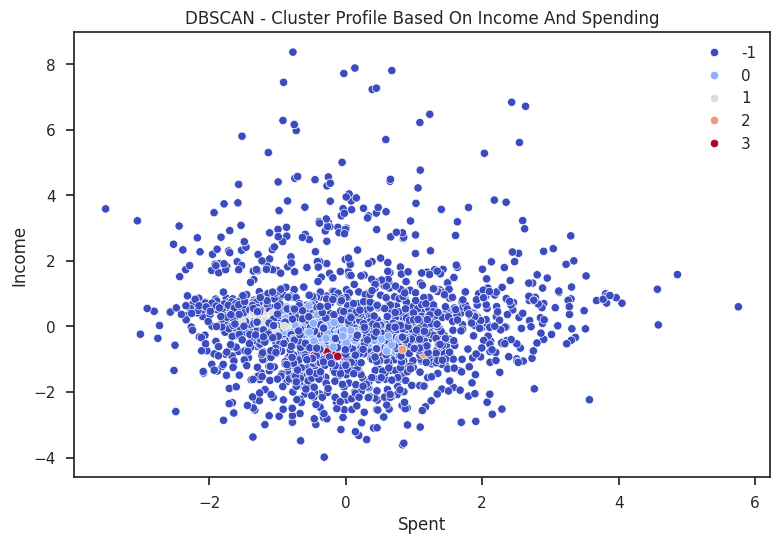

In [ ]:

pl = sns.scatterplot(data = PCA_df1, x=PCA_df1["Spent"], y=PCA_df1["Income"],hue=PCA_df1["Labels"],palette='coolwarm' )
pl.set_title("DBSCAN - Cluster Profile Based On Income And Spending")
plt.legend()
plt.show()

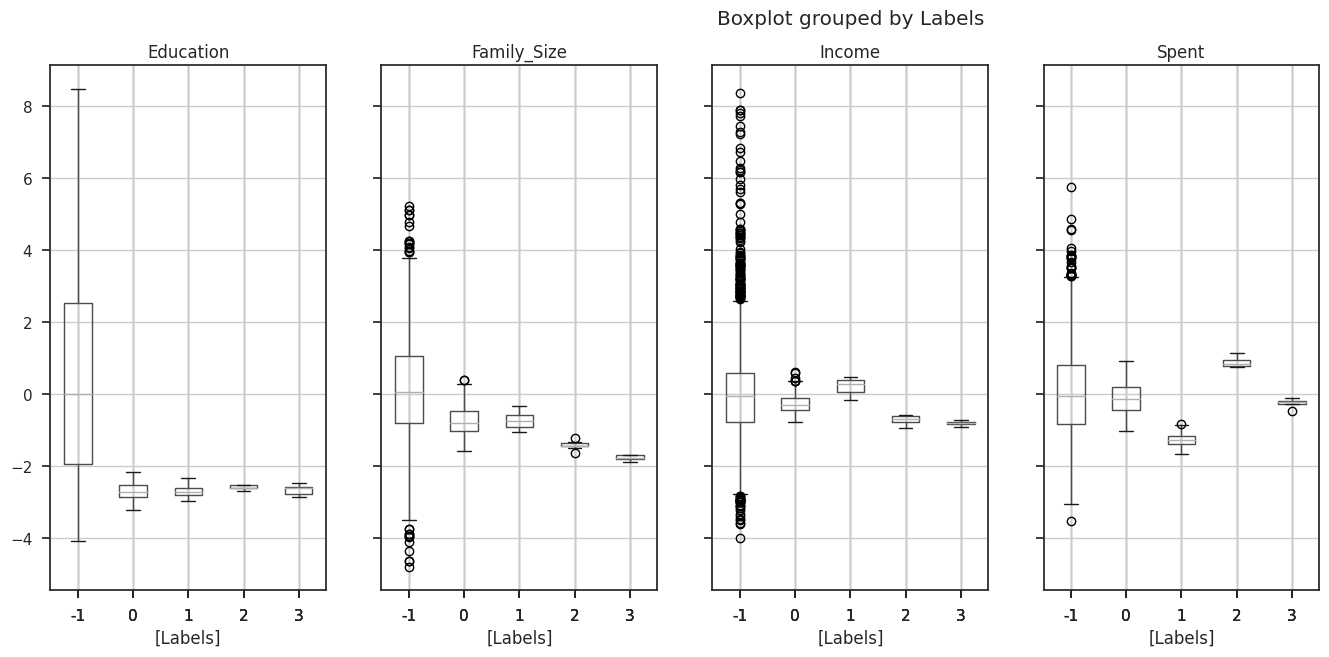

In [ ]:
PCA_df1.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))
plt.show()

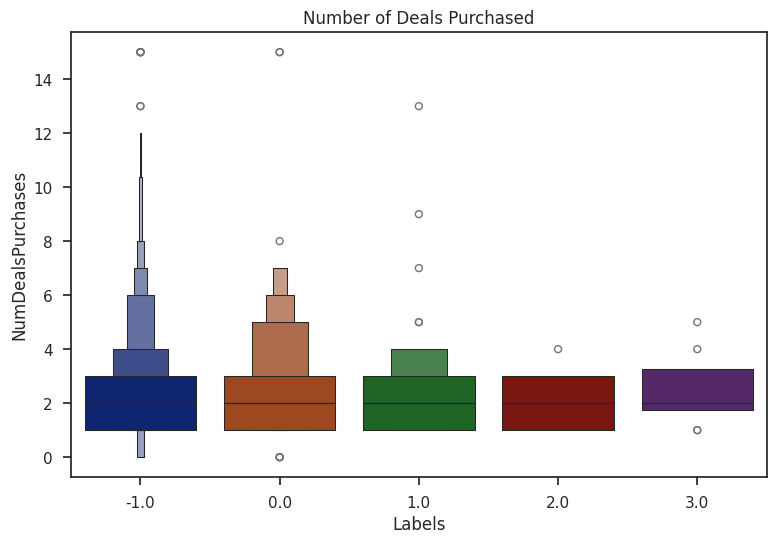

In [ ]:
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=PCA_df1["Labels"], palette='dark')
pl.set_title("Number of Deals Purchased")
plt.show()

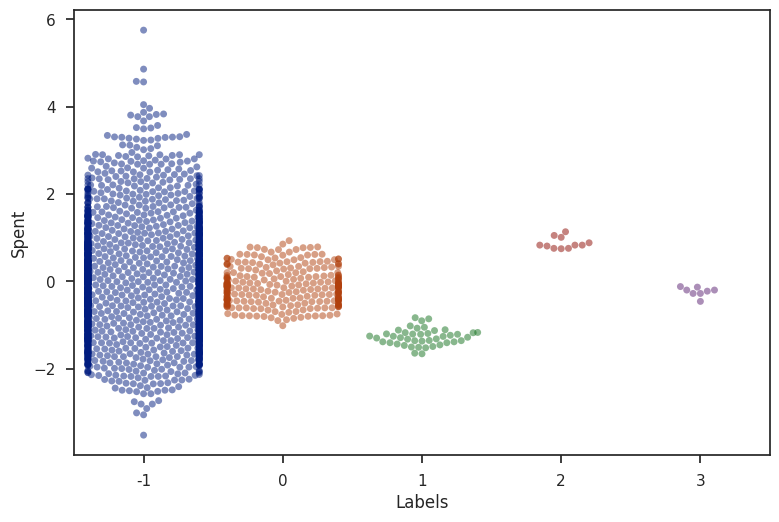

In [ ]:
plt.figure()
pl=sns.swarmplot(x=PCA_df1["Labels"], y=PCA_df1["Spent"], palette='dark', alpha=0.5 )

plt.show()

### Gaussian Mixture Model
A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests.
It is implemented via the GaussianMixture class and the main configuration to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.¶

In [ ]:
from sklearn.mixture import GaussianMixture
#Initiating the GaussianMixture Clustering model
GP = GaussianMixture(n_components=4)
# fit model and predict clusters
GP_df = GP.fit_predict(PCA_df2)
PCA_df2["Labels"] = GP_df
#Adding the Clusters feature to the orignal dataframe.
PCA_df2["Labels"]= GP_df

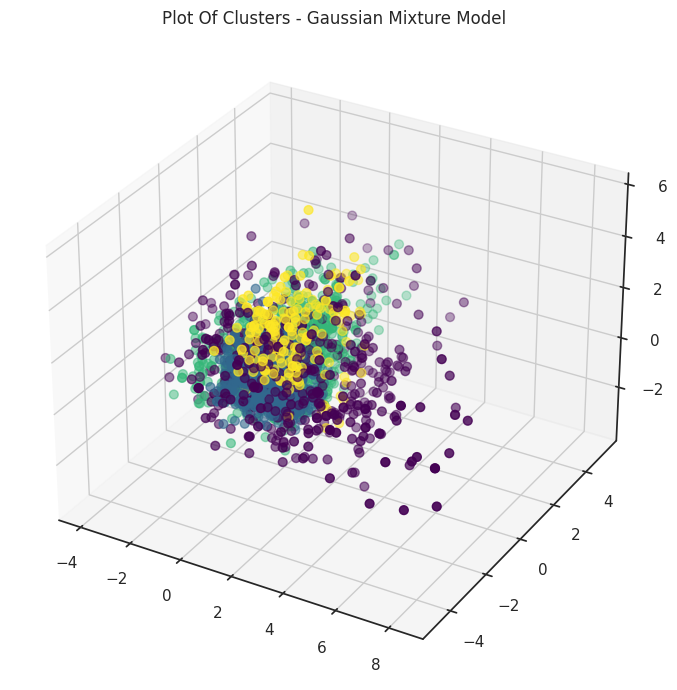

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="black")
ax.scatter(x, y, z, s=40, c=PCA_df2["Labels"], marker='o', cmap = 'viridis' )
ax.set_title("Plot Of Clusters - Gaussian Mixture Model")
plt.show()

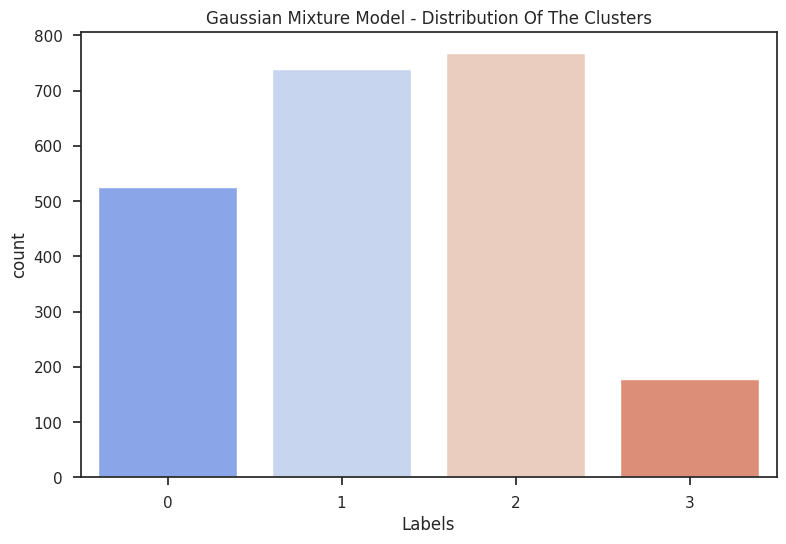

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=PCA_df2["Labels"], palette='coolwarm')
pl.set_title("Gaussian Mixture Model - Distribution Of The Clusters")
plt.show()

In [ ]:
PCA_df2.Labels.value_counts()

Labels
2    770
1    738
0    525
3    179
Name: count, dtype: int64

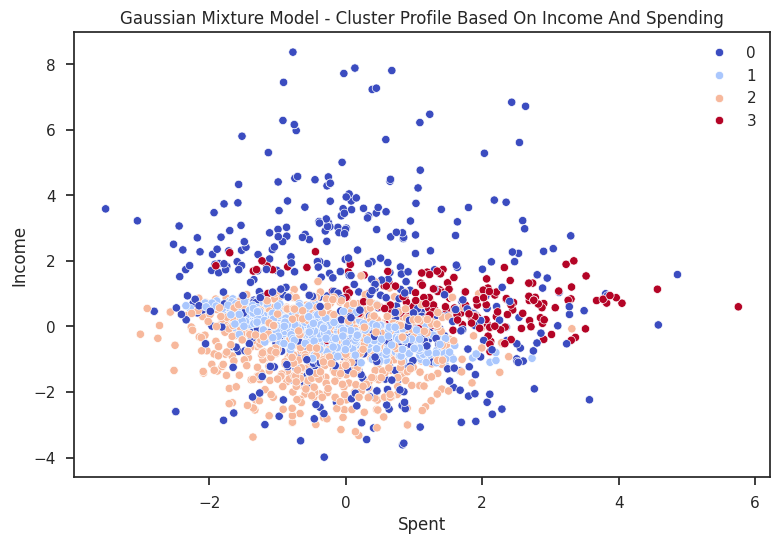

In [ ]:
pl = sns.scatterplot(data = PCA_df2, x=PCA_df2["Spent"], y=PCA_df2["Income"],hue=PCA_df2["Labels"],palette='coolwarm' )
pl.set_title("Gaussian Mixture Model - Cluster Profile Based On Income And Spending")
plt.legend()
plt.show()

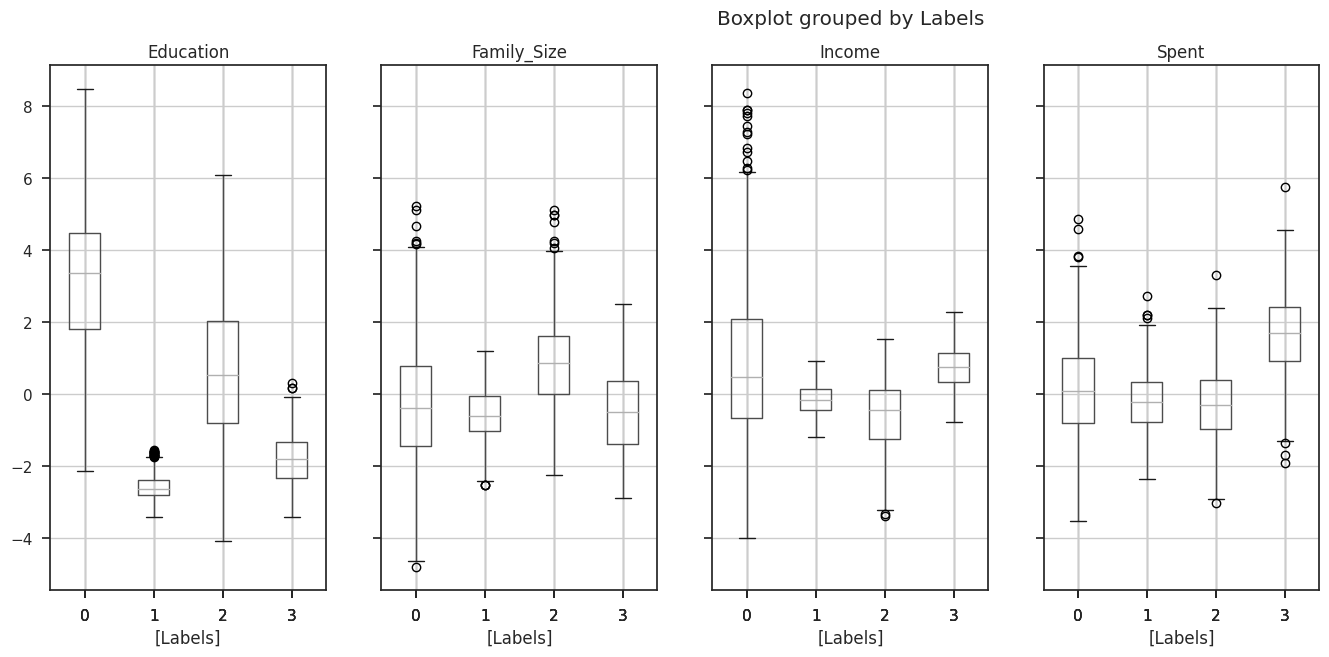

In [ ]:
PCA_df2.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))
plt.show()

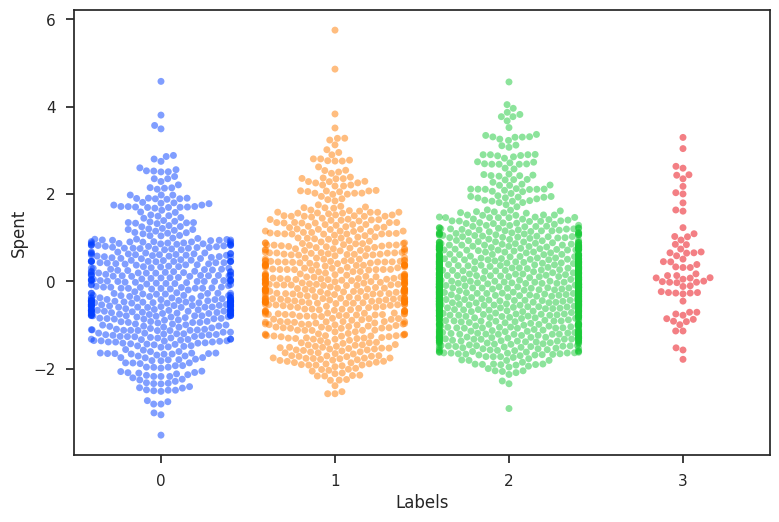

In [ ]:
plt.figure()
pl=sns.swarmplot(x=PCA_df["Labels"], y=PCA_df["Spent"], palette='bright', alpha=0.5 )
plt.show()

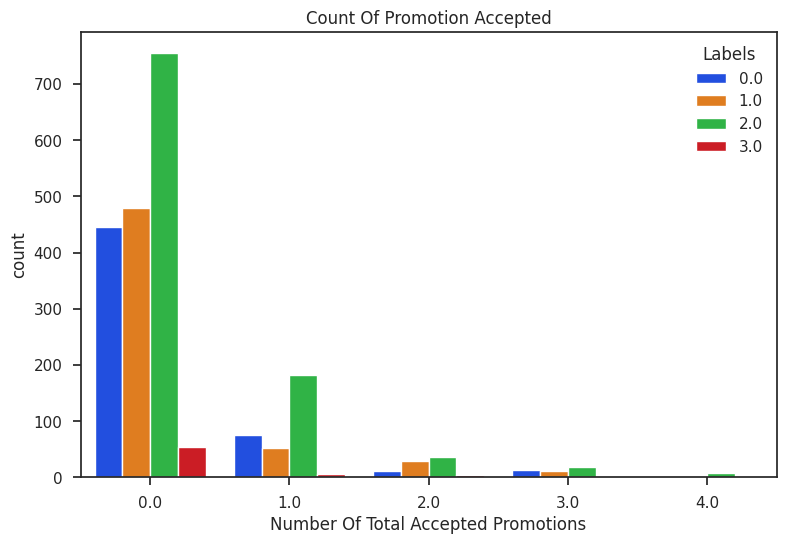

In [ ]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=PCA_df["Labels"], palette='bright')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

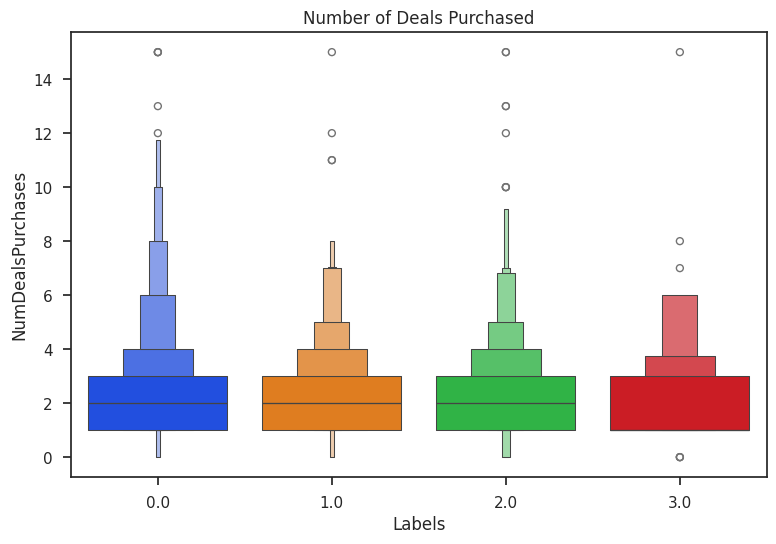

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=PCA_df["Labels"], palette='bright')
pl.set_title("Number of Deals Purchased")
plt.show()

**We could observe some extreme value on the right side of the distribution of the 'Income' feature. Let's use a box plot as it is more suitable to identify extreme values in the data.**

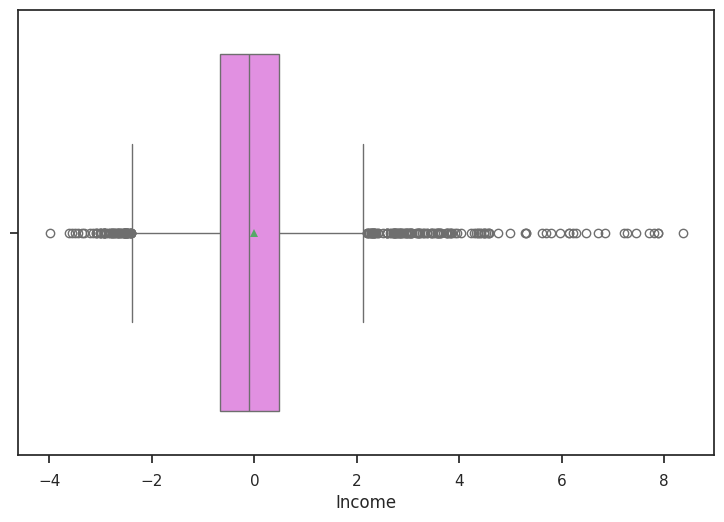

In [ ]:
# Plot the boxplot
sns.boxplot(data=PCA_df, x='Income', showmeans=True, color="violet")
plt.show()

#### **Observations and Insights: _____**

**Think About It**

- The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?

In [ ]:
# Calculating the upper whisker for the Income variable

# Convert 'Income' column to numeric, handling non-numeric values
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')

# Calculating the upper whisker for the Income variable
Q1 = data['Income'].quantile(q=0.25)                          # Finding the first quartile
Q3 = data['Income'].quantile(q=0.75)                          # Finding the third quartile
IQR = Q3 - Q1                                                  # Finding the Inter Quartile Range
upper_whisker = (Q3 + 1.5 * IQR)                              # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

118367.25


In [ ]:
# Let's check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

Education     Income   Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
164   Postgraduate  157243.0     0         1       98      20       2    1582   
617   Postgraduate  162397.0     1         1       31      85       1      16   
655       Graduate  153924.0     0         0       81       1       1       1   
687   Postgraduate  160803.0     0         0       21      55      16    1622   
1300  Postgraduate  157733.0     1         0       37      39       1       9   
1653      Graduate  157146.0     0         0       13       1       0    1725   
2132  Postgraduate  156924.0     0         0       85       2       1       2   

      Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
164     1      2      1          15                 0          
617     2      1      2           0                 0          
655     1      1      1           0                 0          
687    17      3      4          15                 0          
1300    2      0      8           0                 1          
1653    2      1      1           0                 0          
2132    1      1      1           0                 0          

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
164           22                   0                  0                0        
617            0                   1                  1                0        
655            0                   0                  0                0        
687           28                   1                  0                0        
1300           0                   1                  1                0        
1653          28                   0                  1                0        
2132           0                   0                  0                0        

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
164         0             0             0             0           0      
617         0             0             0             0           0      
655         0             0             0             0           0      
687         0             0             0             0           0      
1300        0             0             0             0           0      
1653        0             0             0             0           0      
2132        0             0             0             0           0      

      Response    Customer_For     Age  Spent Living_With  Children  \
164       0     10368000000000000  51   1608     Partner       1      
617       0     33782400000000000  48    107     Partner       2      
655       0     12268800000000000  49      6       Alone       0      
687       0     59961600000000000  42   1717     Partner       0      
1300      0     33696000000000000  53     59     Partner       1      
1653      0     36806400000000000  47   1730     Partner       0      
2132      0     26265600000000000  75      8     Partner       0      

      Family_Size  Is_Parent  
164        3           1      
617        4           1      
655        1           0      
687        2           0      
1300       3           1      
1653       2           0      
2132       2           0

**Think About It:**

- We observed that there are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? Do we know at what percentile the upper whisker lies?

#### **Observations and Insights: _____**




## **2. Univariate analysis - Categorical Data**

Let us write a function that will help us create bar plots that indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [ ]:
def perc_on_bar(data, z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])                                          # Length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot

        ax.annotate(percentage, (x, y), size = 12)                # Annotate the percentage

    plt.show()                                                    # Show the plot

#### Let us plot barplot for the variable Marital_Status.

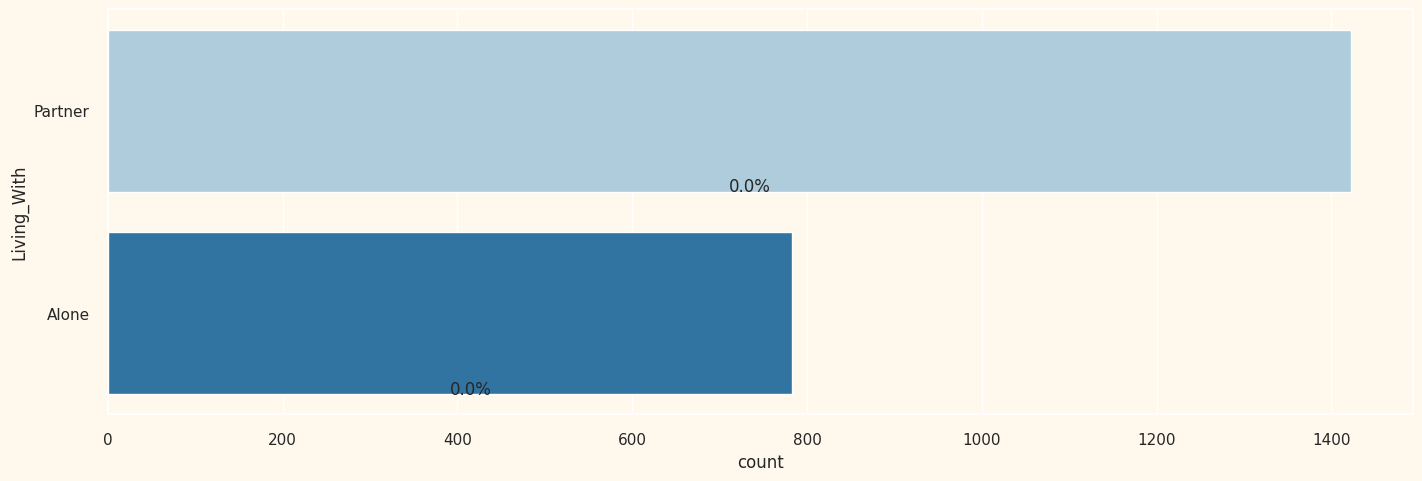

In [ ]:
# Bar plot for 'Living_With'
perc_on_bar(data, 'Living_With')

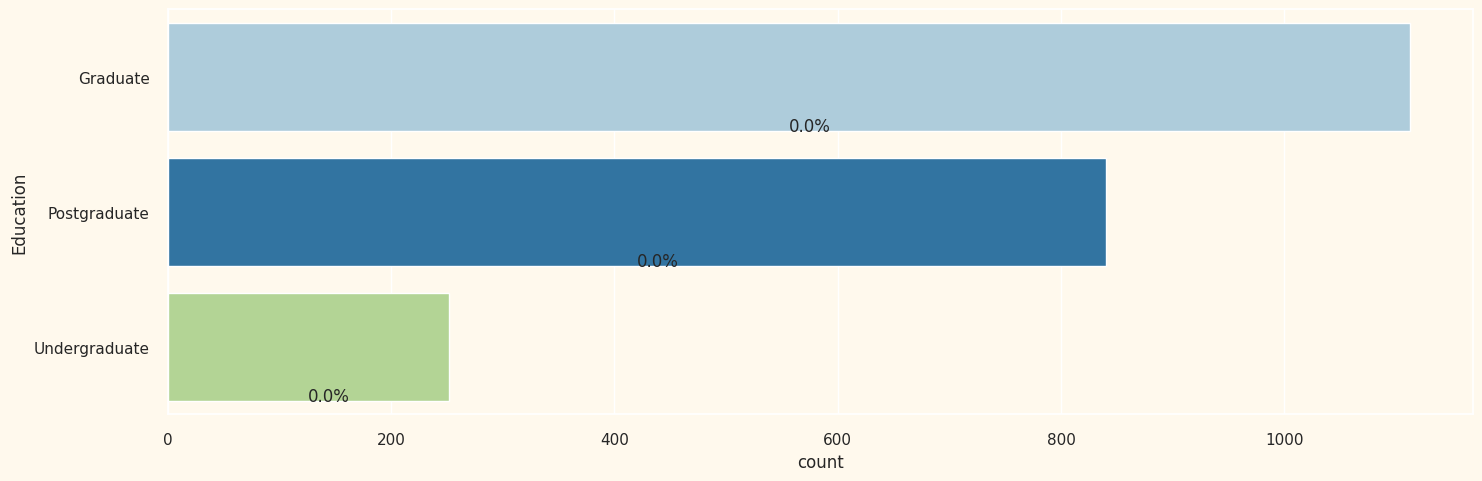

In [ ]:
# Bar plot for 'Education'
perc_on_bar(data, 'Education')

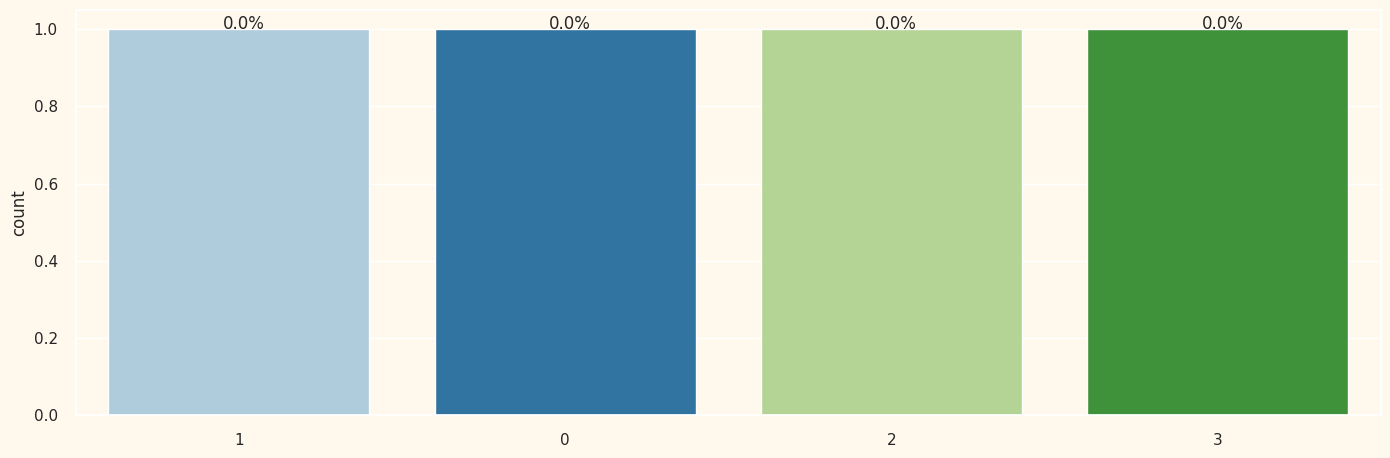

In [ ]:
# Bar plot for 'Children'
perc_on_bar(data, 'Children')

## **Bivariate Analysis**

We have analyzed different categorical and numerical variables. Now, let's check how different variables are related to each other.

#### **Observations and Insights: _____**

**The above correlation heatmap only shows the relationship between numerical variables. Let's check the relationship of numerical variables with categorical variables.**

### **Education Vs Income**

Axes(0.08,0.07;0.87x0.81)


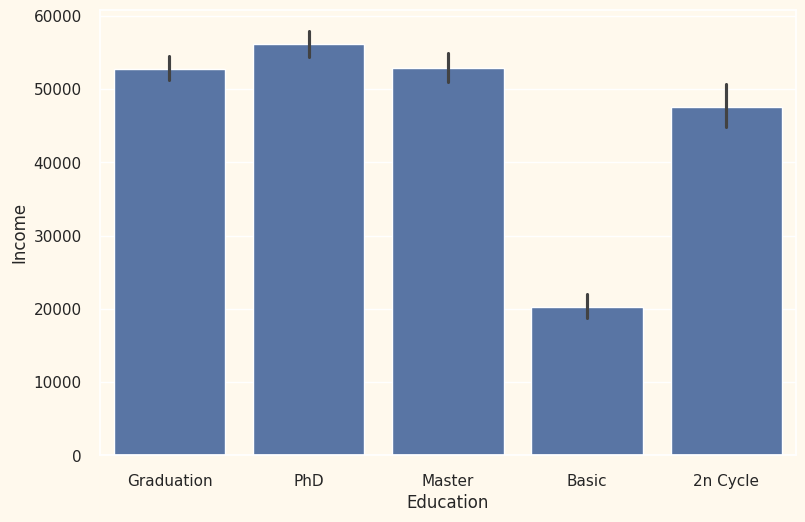

In [ ]:
# Replace 'Education', 'Income' with actual column names from your DataFrame

print(sns.barplot(data=df, x='Education', y='Income'))
plt.show()

## **Conclusion and Recommendations**

I propose Gaussian Mixture model for this particular dataset.

Based on the level of data pre-processing Gaussian Mixture model produced the best cluster combinations

With strong cluster combination, I was able to provide better insights about customer profile, spending behavior and campaign

Yes, it is performing well and visual are insightful.
